<h1 style= "text-align:center ; font-family :Times New Roman; color :#004687 ; font-size: 40px">Supply Chain Management</h1>

#  a) Business Problem:


A FMCG company has entered into the instant noodles business two years back. Their higher 
management has notices that there is a miss match in the demand and supply. Where the demand is 
high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an 
inventory cost loss to the company; hence, the higher management wants to optimize the supply 
quantity in each and every warehouse in entire country.

### Goal & Objective: 
The objective of this exercise is to build a model, using historical data that will 
determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive 
the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once 
you are able to showcase a tangible impact with this much of information then company will open the 
360 degree data lake for your consulting company to build a more robust model.


File: Data.csv
Target variable: product_wg_ton

### Data Dictionary

Ware_house_ID : Unique Warehouse id where product is prepared for dispatch 

WH_Manager_ID : Manager Id present in the warehouse

zone : Zone of the Warehouse

WH_regional_zone : Regional Zone of the warehouse

num_refill_req_l3m : Refilling request received by the warehouse in the last 3 months

transport_issue_l1y : No. of transport issued for warehouse in last 1 year

Competitor_in_mkt : No. of competitors in the market

retail_shop_num : Number of retail shops who sell noodlesproduced by the warehouse

wh_owner_type : The warehouse is owned by the company or it is on rent

distributor_num : No. of distributor who works between warehouse and retail shops

flood_impacted : Is the warehouse in a flood impacted area or not

flood_proof : Warehouse is having flood proof indicator

electric_supply : Does the warehouse have proper electric supply along with some power backup

dist_from_hub : distance from the warehouse to production hub

workers_num : no. workers in the warehouse

wh_est_year : warehouse establishment year

storage_issue_reported_l3m : storage issues reported by the warehouse in the last 3 months

govt_check_l3m : Government checking in last 3 months

temp_reg_mach : warehouse having temperature regulating machine indicator or not

approved_wh_govt_certificate : Type of approval warehouse having been issued by government

wh_breakdown_l3m : Number of times the warehouse faces thebreakdown in the last 3 months

product_wg_ton : Product weight

# 1. Problem Understanding

* a) Defining problem statement 
* b) Need of the study/project 
* c) Understanding business/social opportunity

### answers

### Need of the Study/Project

Effective demand planning and supply chain management are crucial for the success of FMCG companies, especially in the competitive instant noodles market. By optimizing the supply chain, the company can:

1. **Reduce Inventory Costs**: Minimize excess inventory and reduce associated holding costs.
2. **Improve Service Levels**: Ensure timely availability of products in high-demand areas, leading to better customer satisfaction.
3. **Enhance Operational Efficiency**: Streamline logistics and distribution processes, reducing transportation and handling costs.
4. **Increase Market Share**: By meeting demand accurately, the company can capture a larger market share and reduce the risk of stockouts.
5. **Inform Strategic Decisions**: Insights from demand patterns can inform targeted marketing campaigns and strategic decisions.

### Understanding Business/Social Opportunity

#### Significance of Demand Planning and Supply Chain Management

- **Market Responsiveness**: Efficient demand planning allows companies to respond quickly to market changes, ensuring products are available where and when they are needed.
- **Cost Efficiency**: Optimized supply chains reduce costs related to storage, transportation, and handling, directly impacting the bottom line.
- **Sustainability**: Reducing excess inventory and transportation needs contributes to a more sustainable and environmentally friendly operation.
- **Customer Satisfaction**: Ensuring product availability enhances customer satisfaction and loyalty, which are crucial for business growth.

#### Optimization Techniques with Facts & Figures

1. **Statistical Forecasting**: Techniques such as time series analysis, regression models, and machine learning algorithms can predict future demand based on historical data. For example, companies like Walmart use advanced forecasting models to reduce inventory costs by 10-15%.
   
2. **Inventory Optimization**: Tools like Economic Order Quantity (EOQ), Just-In-Time (JIT), and ABC analysis help in maintaining optimal inventory levels. Implementing JIT, Toyota managed to reduce its inventory costs by 20%.

3. **Demand Sensing**: Real-time data analytics allows companies to sense demand shifts quickly. Procter & Gamble uses demand sensing to reduce forecast errors by 30-40%, resulting in better alignment of supply with actual demand.

4. **Supply Chain Coordination**: Collaborative planning and supply chain visibility enhance coordination among suppliers, manufacturers, and distributors. Companies like Dell use supply chain coordination to reduce lead times and increase efficiency.

5. **Network Optimization**: Analyzing and optimizing the distribution network ensures products are stored and transported efficiently. Coca-Cola’s network optimization initiatives have led to a 5-10% reduction in logistics costs.

### Conclusion

Optimizing the supply chain and demand planning for the FMCG company's instant noodles business will lead to significant cost savings, improved service levels, and strategic market advantages. By leveraging historical data and advanced analytics, the company can ensure a balanced supply across all warehouses, aligning with actual demand and driving overall business success.
**Market Insights:** Analyzing demand patterns will offer insights into consumer behavior, enabling better marketing strategies.

**Sustainability:** Reducing waste from overproduction and ensuring timely delivery contribute to sustainable business practices.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Load Datasets

In [2]:
# dataset
df=pd.read_csv("Data.csv")


In [3]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

## 2. Data Report
* a) Understanding how data was collected in terms of time, frequency and methodology 
* b) Visual inspection of data (rows, columns, descriptive details) 
* c) Understanding of attributes (variable info, renaming if required)

### a) Understanding How Data Was Collected

Time Frame: The data spans the last 3 months for refilling requests and storage issues, and the last 1 year for transport issues. The exact date range is not specified but can be inferred from these variables.

Frequency: The data appears to be collected at regular intervals, considering the presence of metrics for specific periods (e.g., last 3 months, last 1 year).

Methodology: The data likely comes from the company's internal logistics and supply chain management systems, with metrics on warehouse operations, transportation, retail distribution, and environmental factors.

###  b) Visual inspection of data (rows, columns, descriptive details)

In [4]:
df.shape

(25000, 24)

25000 rows ,24 columns

In [5]:
df.describe().round(2)


num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count            25000.00             25000.00           25000.00   
mean                 4.09                 0.77               3.10   
std                  2.61                 1.20               1.14   
min                  0.00                 0.00               0.00   
25%                  2.00                 0.00               2.00   
50%                  4.00                 0.00               3.00   
75%                  6.00                 1.00               4.00   
max                  8.00                 5.00              12.00   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
count         25000.00         25000.00         25000.0     25000.00   
mean           4985.71            42.42             0.1         0.05   
std            1052.83            16.06             0.3         0.23   
min            1821.00            15.00             0.0         0.00   
25%            4313.00            29.00             0.0         0.00   
50%            4859.00            42.00             0.0         0.00   
75%            5500.00            56.00             0.0         0.00   
max           11008.00            70.00             1.0         1.00   

       electric_supply  dist_from_hub  workers_num  wh_est_year  \
count         25000.00       25000.00     24010.00     13119.00   
mean              0.66         163.54        28.94      2009.38   
std               0.47          62.72         7.87         7.53   
min               0.00          55.00        10.00      1996.00   
25%               0.00         109.00        24.00      2003.00   
50%               1.00         164.00        28.00      2009.00   
75%               1.00         218.00        33.00      2016.00   
max               1.00         271.00        98.00      2023.00   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                    25000.00       25000.00          25000.00   
mean                        17.13           0.30              3.48   
std                          9.16           0.46              1.69   
min                          0.00           0.00              0.00   
25%                         10.00           0.00              2.00   
50%                         18.00           0.00              3.00   
75%                         24.00           1.00              5.00   
max                         39.00           1.00              6.00   

       govt_check_l3m  product_wg_ton  
count        25000.00        25000.00  
mean            18.81        22102.63  
std              8.63        11607.76  
min              1.00         2065.00  
25%             11.00        13059.00  
50%             21.00        22101.00  
75%             26.00        30103.00  
max             32.00        55151.00

In [6]:
# Get descriptive statistics of the dataset
df.describe(include='all')

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
count          25000         25000         25000            25000  25000   
unique         25000         25000             2                3      4   
top        WH_114429     EID_67362         Rural            Large  North   
freq               1             1         22957            10169  10278   
mean             NaN           NaN           NaN              NaN    NaN   
std              NaN           NaN           NaN              NaN    NaN   
min              NaN           NaN           NaN              NaN    NaN   
25%              NaN           NaN           NaN              NaN    NaN   
50%              NaN           NaN           NaN              NaN    NaN   
75%              NaN           NaN           NaN              NaN    NaN   
max              NaN           NaN           NaN              NaN    NaN   

       WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
count             25000        25000.000000         25000.000000   
unique                6                 NaN                  NaN   
top              Zone 6                 NaN                  NaN   
freq               8339                 NaN                  NaN   
mean                NaN            4.089040             0.773680   
std                 NaN            2.606612             1.199449   
min                 NaN            0.000000             0.000000   
25%                 NaN            2.000000             0.000000   
50%                 NaN            4.000000             0.000000   
75%                 NaN            6.000000             1.000000   
max                 NaN            8.000000             5.000000   

        Competitor_in_mkt  retail_shop_num  ... electric_supply  \
count        25000.000000     25000.000000  ...    25000.000000   
unique                NaN              NaN  ...             NaN   
top                   NaN              NaN  ...             NaN   
freq                  NaN              NaN  ...             NaN   
mean             3.104200      4985.711560  ...        0.656880   
std              1.141663      1052.825252  ...        0.474761   
min              0.000000      1821.000000  ...        0.000000   
25%              2.000000      4313.000000  ...        0.000000   
50%              3.000000      4859.000000  ...        1.000000   
75%              4.000000      5500.000000  ...        1.000000   
max             12.000000     11008.000000  ...        1.000000   

        dist_from_hub   workers_num   wh_est_year  storage_issue_reported_l3m  \
count    25000.000000  24010.000000  13119.000000                25000.000000   
unique            NaN           NaN           NaN                         NaN   
top               NaN           NaN           NaN                         NaN   
freq              NaN           NaN           NaN                         NaN   
mean       163.537320     28.944398   2009.383185                   17.130440   
std         62.718609      7.872534      7.528230                    9.161108   
min         55.000000     10.000000   1996.000000                    0.000000   
25%        109.000000     24.000000   2003.000000                   10.000000   
50%        164.000000     28.000000   2009.000000                   18.000000   
75%        218.000000     33.000000   2016.000000                   24.000000   
max        271.000000     98.000000   2023.000000                   39.000000   

        temp_reg_mach  approved_wh_govt_certificate  wh_breakdown_l3m  \
count    25000.000000                         24092      25000.000000   
unique            NaN                             5               NaN   
top               NaN                             C               NaN   
freq              NaN                          5501               NaN   
mean         0.303280                           NaN          3.482040   
std          0.459684                           NaN          

### c) Understanding of attributes (variable info, renaming if required)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [8]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

### 3. Exploratory Data Analysis
* a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones) 
* b) Bivariate analysis (relationship between different variables , correlations)
* c) Removal of unwanted variables (if applicable) b) Missing Value treatment (if applicable) 
* d) Outlier treatment (if required) e) Variable transformation (if applicable) 
* f) Addition of new variables (if required)


In [9]:
##################### ANSWER

**a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)**

In [10]:
df_num=df.select_dtypes(include=["int64","float64"])

In [11]:
df_num.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [12]:
df_cat=df.select_dtypes(include=['object'])

In [13]:
df_cat.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

#### every continuous attribute

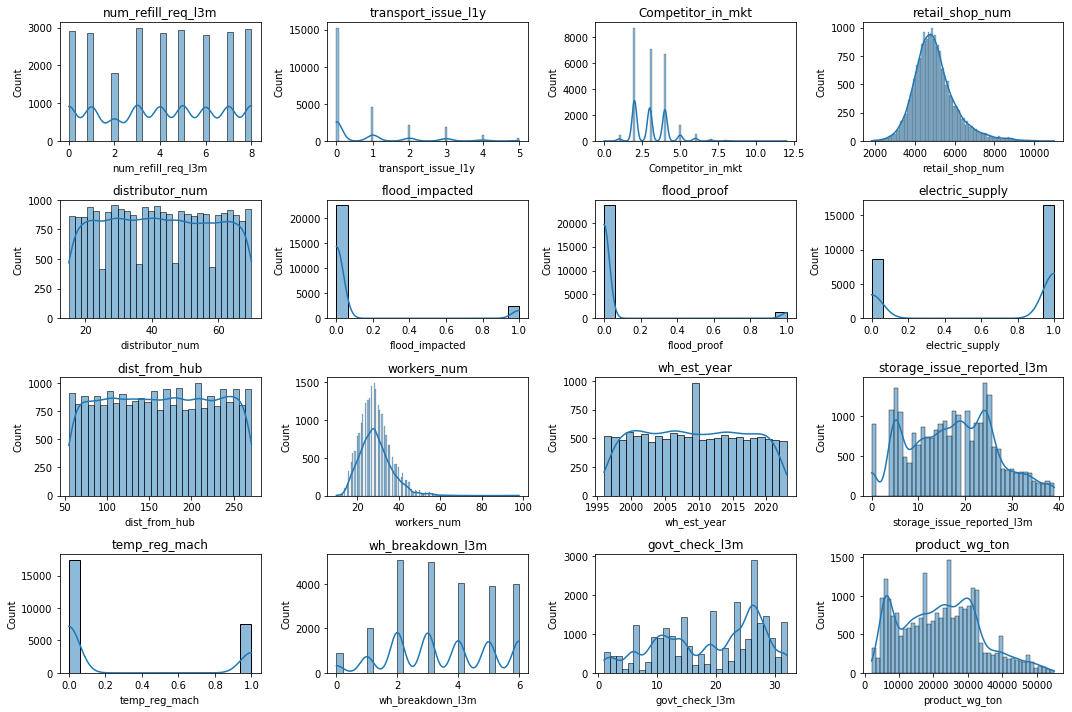

In [14]:
# Histograms for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(df_num, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[var], kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

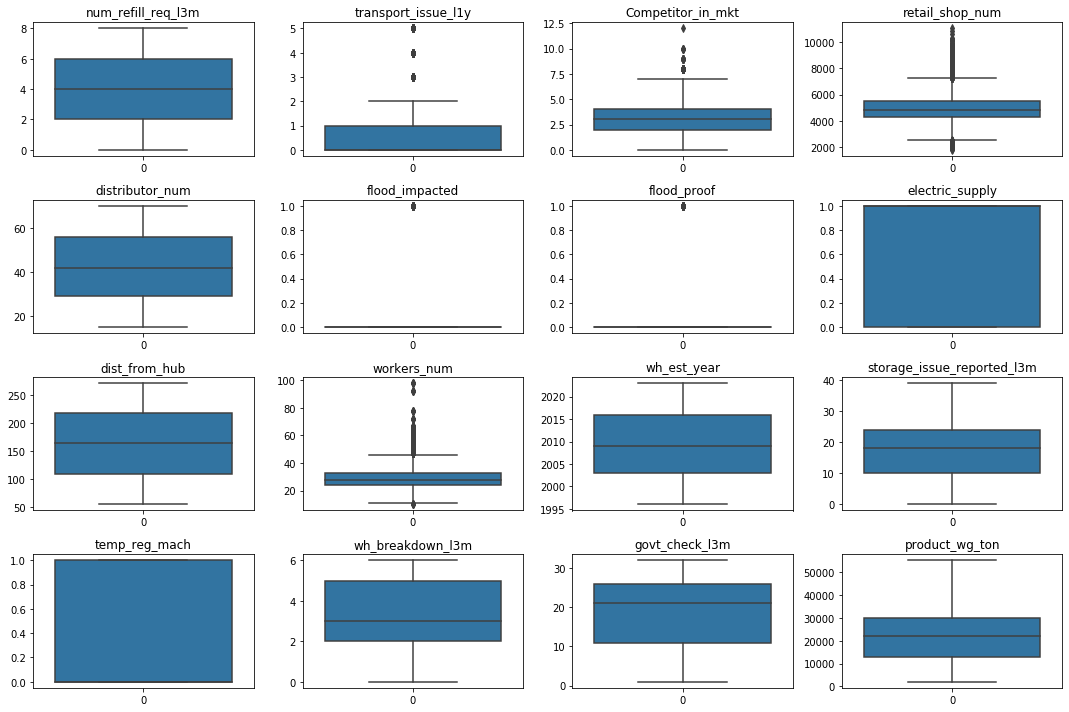

In [15]:
# Histograms for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(df_num, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

#### distribution of data in categories for categorical ones

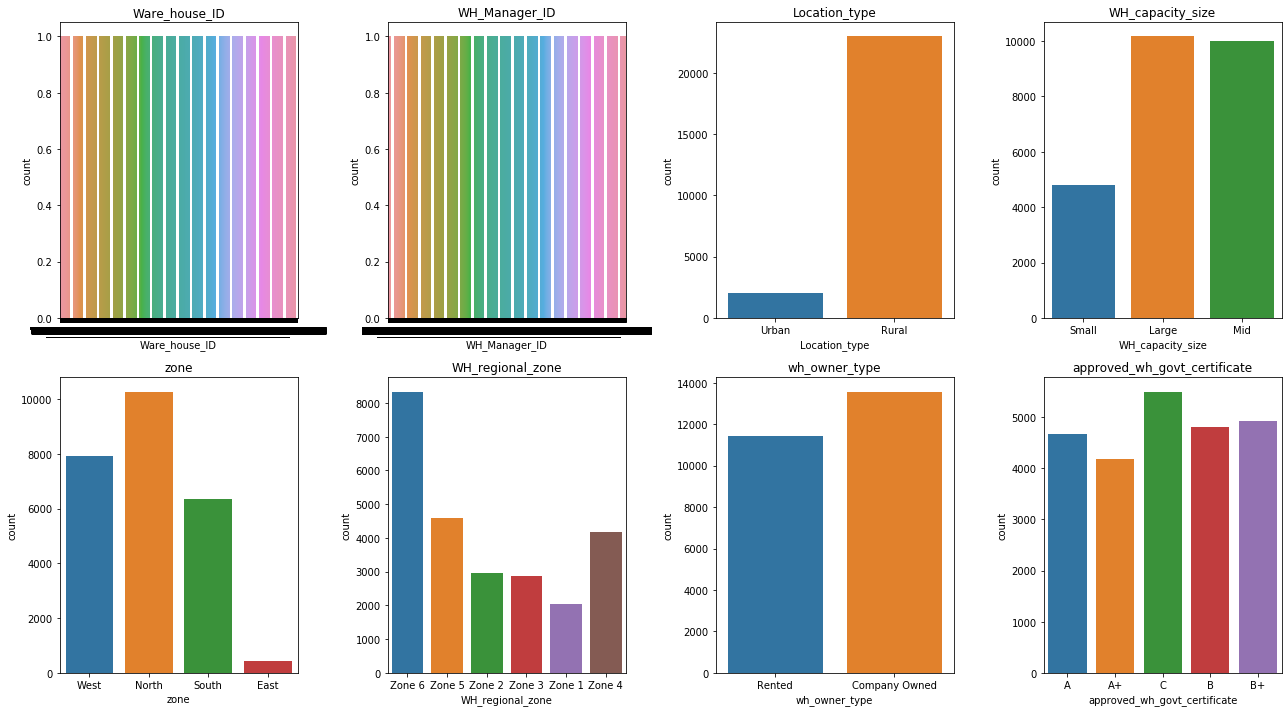

In [16]:
plt.figure(figsize=(18, 10))
for i, var in enumerate(df_cat.columns):
    plt.subplot(2, 4, i+1)
    sns.countplot(data=df, x=var)
    plt.title(var)
plt.tight_layout()
plt.show()

1. **Warehouse ID (Ware_house_ID)**:
   - The distribution across different warehouse IDs appears relatively uniform, with only minor variations.
   - No specific warehouse ID dominates significantly, which suggests a balanced distribution of products across warehouses.

2. **Warehouse Manager ID (WM_Manager_ID)**:
   - Similar to warehouse IDs, the manager IDs also show a fairly uniform distribution.
   - No specific manager seems to handle a disproportionately large number of warehouses.

3. **Location Type**:
   - The majority of warehouses fall into the 'rural' category, indicating that urban areas have more warehouses.
   - There are fewer warehouses in urban areas, which might impact supply and demand dynamics differently.

4. **Warehouse Capacity Size (WH_capacity_size)**:
   - The 'large' capacity category has the highest count, followed by 'mild' and 'small.'
   - This distribution could influence inventory management and logistics planning.

5. **Zones **:
   - The counts vary significantly across different Zones.
   - The highest count is in Zone 6, while the Zone 1 has the lowest count.
   - This information can guide targeted marketing efforts based on regional demand.
   
6. **Regional Zones (WH_regional_zone)**:
   - The counts vary significantly across different regions.
   - The highest count is in the North region, while the East region has the lowest count.
   - This information can guide targeted marketing efforts based on regional demand.

6. **Ownership Type (wh_owner_type)**:
   - Most warehouses are either 'Rented' or 'Company Owned.'
   - The 'Company Owned' category has a higher count, suggesting a mix of ownership models.
7. **'approved_wh_govt_certificate'**
   -  there are 5 types of certificates (A,A+, B,B+, C), with C_certification having the highest count.



we can drop the         Ware_house_ID  , WH_Manager_ID   

### b) Bivariate analysis (relationship between different variables , correlations)

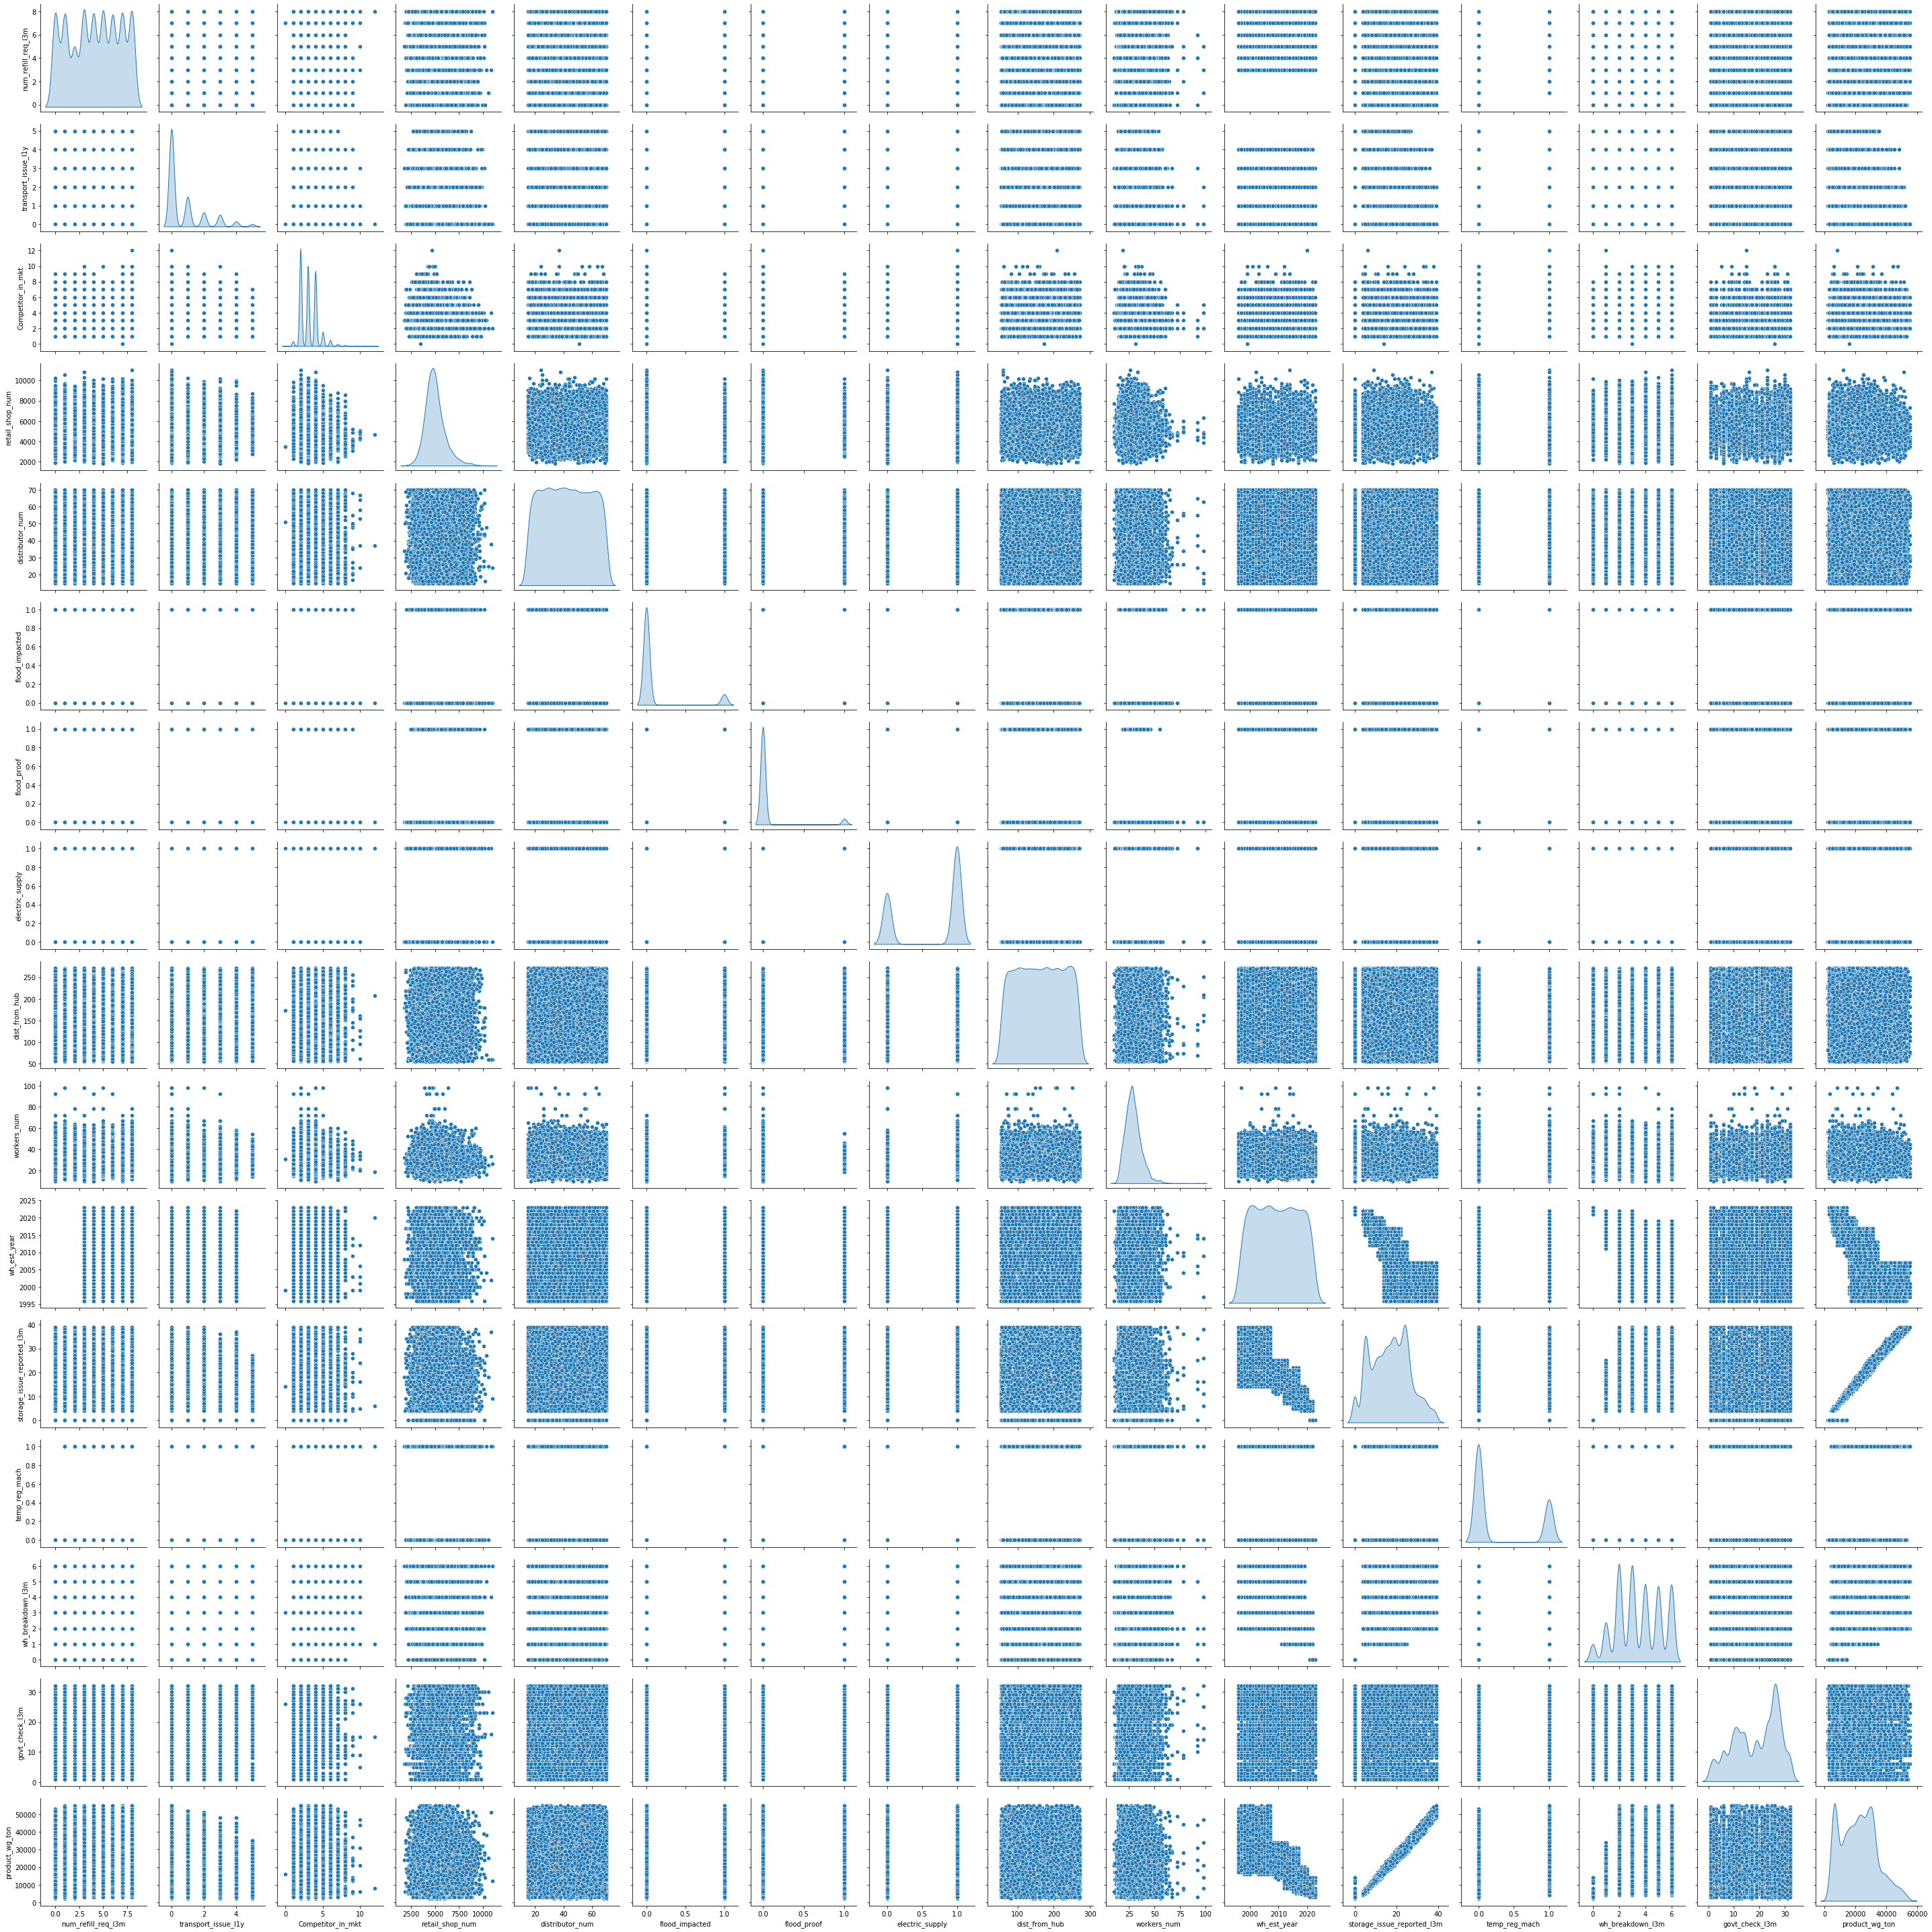

In [17]:
sns.pairplot(data=df_num, diag_kind='kde')
plt.tight_layout()
plt.show()

#### Warehouse location type

  Location_type  product_wg_ton
0         Rural       501482582
1         Urban        51083241
  


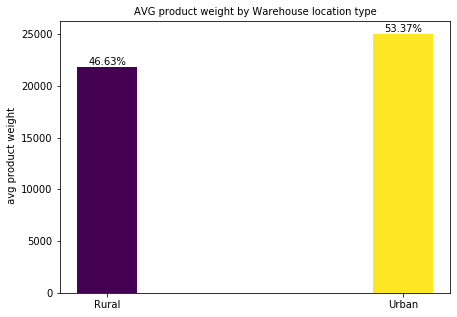

In [18]:
plt.figure(figsize=(7, 5))

# Warehouse location type
product_weight_sum = df.groupby('Location_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2)
print(product_weight_sum)
print('  ')

# Plot 2
x = df.groupby('Location_type')['product_wg_ton'].mean()
total_weight = x.sum()
percentages = (x / total_weight) * 100

# Use a colormap from matplotlib
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))

bars = plt.bar(x.index, x.values, width=0.2, color=colors)  # Apply colormap to bars
plt.title('AVG product weight by Warehouse location type', fontsize=10)
plt.ylabel(' avg product weight')

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


- Urban areas receive 9.24% of the total product weight.
- Rural areas receive 90.76% of the total product weight.
- The product weight distributed to rural areas is significantly higher than that to urban areas.

#### Warehouse Owner Type

   wh_owner_type  product_wg_ton
0  Company Owned       299270114
1         Rented       253295709
  


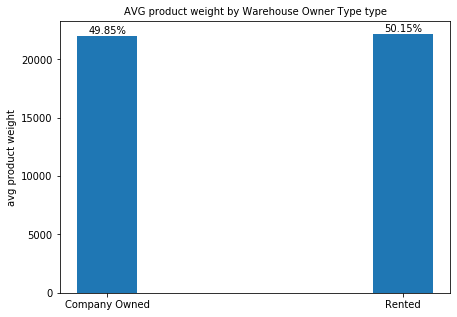

In [19]:
# Warehouse Owner Type
plt.figure(figsize=(7, 5))

product_weight_sum = df.groupby('wh_owner_type')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2)
print(product_weight_sum)
print('  ')

# Plot 2
x = df.groupby('wh_owner_type')['product_wg_ton'].mean()
total_weight = x.sum()
percentages = (x / total_weight) * 100



bars = plt.bar(x.index, x.values, width=0.2)  # Apply colormap to bars
plt.title('AVG product weight by Warehouse Owner Type type', fontsize=10)
plt.ylabel('avg product weight')

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()



- 46% of warehouses are rented, while 54% are company-owned.
- The average product weight in rented and company-owned warehouses is almost the same.
- Despite being fewer in number, company-owned warehouses handle a slightly higher total product weight than rented warehouses.

In [20]:
df['temp_reg_mach'] = df['temp_reg_mach'].astype('category')


#### Temperature regulating machine availability

  temp_reg_mach  product_wg_ton
0             0       371425974
1             1       181139849
  


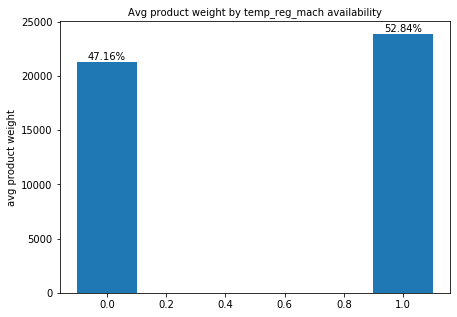

In [21]:
# Temperature regulating machine availability
plt.figure(figsize=(7, 5))

product_weight_sum = df.groupby('temp_reg_mach')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2)
print(product_weight_sum)
print('  ')

# Plot 2
x = df.groupby('temp_reg_mach')['product_wg_ton'].mean()
total_weight = x.sum()
percentages = (x / total_weight) * 100



bars = plt.bar(x.index, x.values, width=0.2) 
plt.title('Avg product weight by temp_reg_mach availability', fontsize=10)
plt.ylabel('avg product weight')

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


- 67.8% of warehouses do not have temperature regulating machines, while 32.7% do.
- Warehouses with temperature regulating machines handle a total product weight of 101,599,625 units, whereas those without handle 208,418,842 units.
- On average, warehouses without temperature regulating machines handle less product weight compared to those with this equipment available.

#### electric_supply

   electric_supply  product_wg_ton
1                1       362671887
0                0       189893936
  


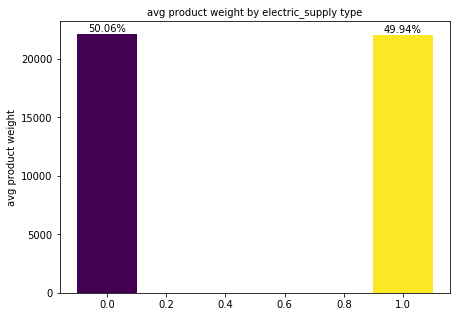

In [22]:
plt.figure(figsize=(7, 5))

# electric_supply
product_weight_sum = df.groupby('electric_supply')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2)
print(product_weight_sum)
print('  ')


x = df.groupby('electric_supply')['product_wg_ton'].mean()
total_weight = x.sum()
percentages = (x / total_weight) * 100

# Use a colormap from matplotlib
colors = plt.cm.viridis(np.linspace(0, 1, len(x)))

bars = plt.bar(x.index, x.values, width=0.2, color=colors)  # Apply colormap to bars
plt.title('avg product weight by electric_supply type', fontsize=10)
plt.ylabel('avg product weight')

# Add percentage labels
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


- 65.63% of surveyed warehouses do not have accessible electric supply, while 34.37% do.
- Warehouses with accessible electric supply hold a total product weight of 203,327,830 units, whereas those without hold 106,690,637 units.
- On average, warehouses without accessible electric supply manage a lower product weight compared to those with electricity available.

### Storage issue reported in the last 3 months

Unique values in Storage issue reported [13  4 17 18 23 24  6 11 22  9 29 19 14 28 25 12  8  0 34 16 38 21 15 36
 31 20 10 32 27 26  7 37 30  5 39 33 35]
  
    storage_issue_reported_l3m  product_wg_ton
21                          24        42904667
22                          25        39461458
17                          20        27006058
20                          23        26797528
19                          22        25472459
  


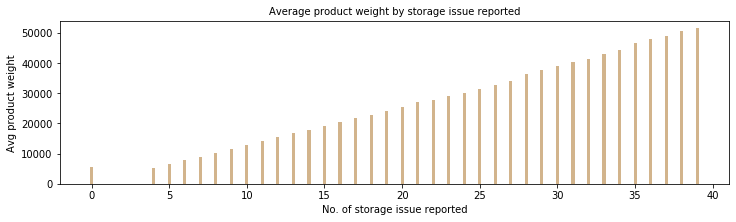

In [23]:
print("Unique values in Storage issue reported", df['storage_issue_reported_l3m'].unique())
print('  ')
print(df.groupby('storage_issue_reported_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')
plt.figure(figsize=(12, 3))
# storage issue reported in the last 3 months       

x = df.groupby('storage_issue_reported_l3m')['product_wg_ton'].mean()
plt.bar(x.index, x.values, color='tan', width=0.2)
plt.title('Average product weight by storage issue reported', fontsize=10)
plt.xlabel('No. of storage issue reported')
plt.ylabel('Avg product weight')

plt.show()

plt.show()

- There is a strong correlation between product weight and storage issues, indicating a nearly linear relationship.
- As product weight increases, the occurrence of storage issues also escalates accordingly.

#### No. of warehouse breakdown in the last 3 months¶


Unique values in no. of warehouse breakdown [5 3 6 4 2 1 0]
  
   wh_breakdown_l3m  product_wg_ton
3                 3       110723620
2                 2       109370976
4                 4       103310885
6                 6       101532553
5                 5        99024135
  


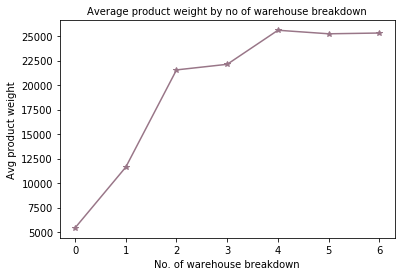

In [24]:
print("Unique values in no. of warehouse breakdown" , df['wh_breakdown_l3m'].unique())
print('  ')
print(df.groupby('wh_breakdown_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')
x = df.groupby('wh_breakdown_l3m')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of warehouse breakdown')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of warehouse breakdown', fontsize=10)

plt.show()

- There is a positive correlation between product weight and the frequency of warehouse breakdowns, suggesting that as product weight increases, so does the likelihood of warehouse breakdowns occurring.
- Warehouses with the highest frequency of breakdowns also tend to handle higher total product weights.

#### ZONES

Unique values in zone ['West' 'North' 'South' 'East']
  
Unique values in zone ['West' 'North' 'South' 'East']
  
    zone  product_wg_ton
1  North       228165823
3   West       175111596
2  South       139540901
0   East         9747503
  


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


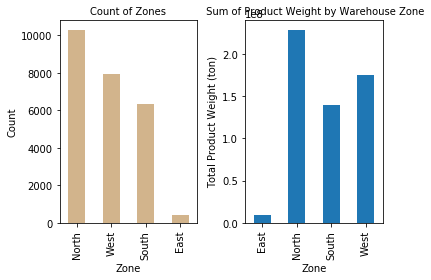

In [25]:
# Plot 2: Bar plot (as an example, a bar plot of value counts of zones)
print("Unique values in zone" , df['zone'].unique())
print('  ')
# zone
print("Unique values in zone" , df['zone'].unique())
print('  ')
print(df.groupby('zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.subplot(1,2,1)
df['zone'].value_counts().plot(kind='bar', color='tan')
plt.title('Count of Zones', fontsize=10)
plt.xlabel('Zone')
plt.ylabel('Count')
plt.subplot(1,2,2)
x = df.groupby('zone')['product_wg_ton'].sum()
# Bar plot
plt.subplot(1, 2, 2)
x.plot(kind='bar')
plt.title(' Sum of Product Weight by Warehouse Zone', fontsize=10)
plt.xlabel('Zone')
plt.ylabel('Total Product Weight (ton)')

plt.tight_layout()
plt.show()

- The North Zone has the highest production levels, while the East Zone has the lowest.
- The following chart shows that product weight remains fairly stable across different zones.
- Zones with more frequent product weight values have higher total product weights.

#### regional zone

Unique values in zone ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
  
  WH_regional_zone  product_wg_ton
5           Zone 6       184421651
4           Zone 5       101017613
3           Zone 4        92596029
1           Zone 2        66580768
2           Zone 3        63290230
0           Zone 1        44659532
  


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


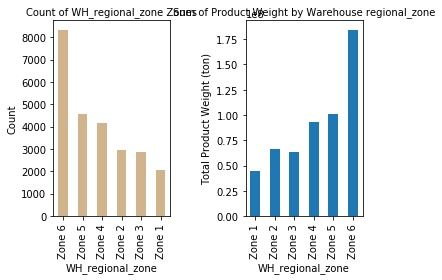

In [26]:
# Plot 2: Bar plot (as an example, a bar plot of value counts of WH_regional_zone)
# zone
print("Unique values in zone" , df['WH_regional_zone'].unique())
print('  ')
print(df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.subplot(1,2,1)
df['WH_regional_zone'].value_counts().plot(kind='bar', color='tan')
plt.title('Count of WH_regional_zone Zones', fontsize=10)
plt.xlabel('WH_regional_zone')
plt.ylabel('Count')
plt.subplot(1,2,2)
x = df.groupby('WH_regional_zone')['product_wg_ton'].sum()
# Bar plot
plt.subplot(1, 2, 2)
x.plot(kind='bar')
plt.title('Sum of Product Weight by Warehouse regional_zone', fontsize=10)
plt.xlabel('WH_regional_zone')
plt.ylabel('Total Product Weight (ton)')

plt.tight_layout()
plt.show()

- Regional Zone 6 has a notably high number of warehouses.
- The accompanying chart indicates that product weight remains relatively consistent across different Regional Zones.
- Higher total product weight is observed in zones where the frequency of product weight values is greater.

####  Government certification grades

Unique values in Government certification grades ['A' 'A+' 'C' 'B' 'B+' nan]
  
  approved_wh_govt_certificate  product_wg_ton
4                            C       115184830
0                            A       112676348
1                           A+       111974920
3                           B+       105499193
2                            B       102299663
  


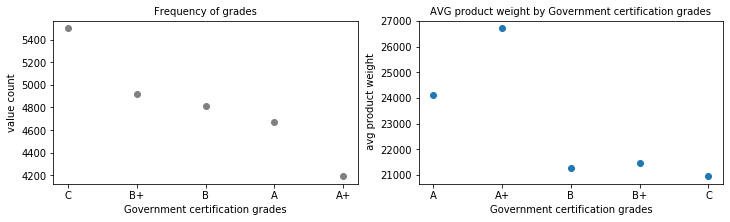

In [27]:
print("Unique values in Government certification grades", df['approved_wh_govt_certificate'].unique())
print('  ')
print(df.groupby('approved_wh_govt_certificate')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['approved_wh_govt_certificate'].value_counts()

plt.scatter(x.index, x.values, color='grey' , marker='o')
plt.xlabel('Government certification grades')
plt.title('Frequency of grades', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('approved_wh_govt_certificate')['product_wg_ton'].mean()

plt.scatter(x.index, x.values, marker='o')
plt.title('AVG product weight by Government certification grades', fontsize=10)
plt.xlabel('Government certification grades')
plt.ylabel(' avg product weight')

plt.show()

- The average product weight across different grades shows that warehouses with the highest government approvals also have the highest product weights.
- Despite being the lowest designation, C grade warehouses have the highest total product weights, mainly because most warehouses fall under the C grade category.

#### govt checking in last 3 months

Unique values in govt checking in last 3 months [15 17 22 27 24  3  6  2 28  1 11  9 12 21 19  8 14 23 26 29 10 13 30 32
  7 25 31 20  5 16 18  4]
  
    govt_check_l3m  product_wg_ton
25              26        64681731
22              23        41001490
18              19        35595929
13              14        31892835
27              28        31869593
  


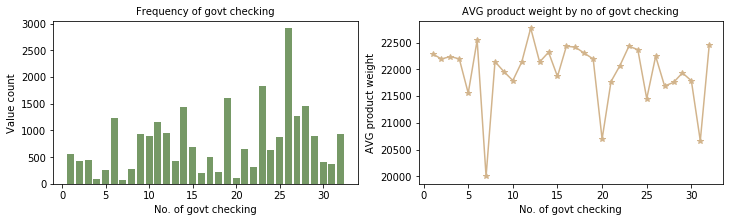

In [28]:
# govt_check_l3m
print("Unique values in govt checking in last 3 months" , df['govt_check_l3m'].unique())
print('  ')
print(df.groupby('govt_check_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['govt_check_l3m'].value_counts()

plt.bar(x.index, x.values, color='#769966')
plt.xlabel('No. of govt checking')
plt.ylabel('Value count')
plt.title('Frequency of govt checking', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('govt_check_l3m')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='tan', marker='*')
plt.xlabel('No. of govt checking')
plt.ylabel('AVG product weight')
plt.title('AVG product weight by no of govt checking', fontsize=10)

plt.show()

- The number of government checks in the last 3 months ranges from 1 to 32 times, with the bar graph showing significant variations in the frequency of these checks.
- As the frequency of government checks increases, the total product weight also increases. However, the average product weight remains relatively stable.

####  workers_num

Unique values in No. of workers [29. 31. 37. 21. 25. 35. 27. 23. 22. 43. 16. 28. 36. 19. 24. 41. 20. 17.
 46. 30. 33. 32. nan 26. 38. 39. 40. 34. 44. 18. 11. 12. 42. 45. 47. 15.
 48. 50. 62. 49. 56. 53. 98. 14. 55. 54. 61. 10. 51. 57. 78. 52. 13. 92.
 65. 60. 64. 72. 58. 67. 63.]
  
    workers_num  product_wg_ton
18         28.0        33131836
17         27.0        31606962
19         29.0        29440582
16         26.0        28681516
14         24.0        27792259
  


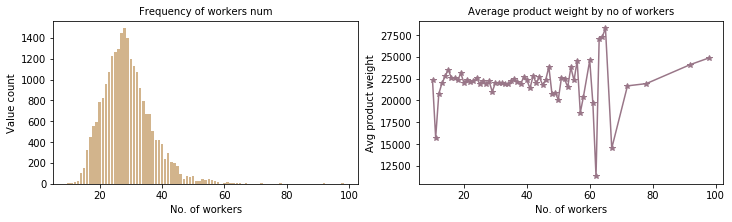

In [29]:
# workers_num
print("Unique values in No. of workers" , df['workers_num'].unique())
print('  ')
print(df.groupby('workers_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# plot 1

ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['workers_num'].value_counts()

plt.bar(x.index, x.values, color='tan')
plt.xlabel('No. of workers')
plt.ylabel('Value count')
plt.title('Frequency of workers num', fontsize=10)

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('workers_num')['product_wg_ton'].mean()
plt.plot(x.index, x.values, color='#997688', marker='*')
plt.xlabel('No. of workers')
plt.ylabel('Avg product weight')
plt.title('Average product weight by no of workers', fontsize=10)

plt.show()

#### No. of workers

*  The value count graph exhibits a distribution resembling a normal curve, with the exception of the central point, which registers higher than all others.
*  There are no significant variations in average product weight in relation to the number of workers. However, when the workforce is at its smallest, the average product weight tends to be lower.

#### Warehouse capacity_size

Unique values in Warehouse capacity_size ['Small' 'Large' 'Mid']
  
  WH_capacity_size  product_wg_ton
0            Large       224739861
1              Mid       222467027
2            Small       105358935
  


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


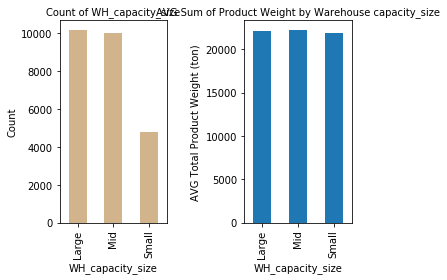

In [30]:
# Plot 2: Bar plot (as an example, a bar plot of value counts of Warehouse capacity_size)
print("Unique values in Warehouse capacity_size" , df['WH_capacity_size'].unique())
print('  ')
print(df.groupby('WH_capacity_size')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.subplot(1,2,1)
df['WH_capacity_size'].value_counts().plot(kind='bar', color='tan')
plt.title('Count of WH_capacity_size', fontsize=10)
plt.xlabel('WH_capacity_size')
plt.ylabel('Count')
plt.subplot(1,2,2)
x = df.groupby('WH_capacity_size')['product_wg_ton'].mean()
# Bar plot
plt.subplot(1, 2, 2)
x.plot(kind='bar')
plt.title('AVG Sum of Product Weight by Warehouse capacity_size', fontsize=10)
plt.xlabel('WH_capacity_size')
plt.ylabel('AVG Total Product Weight (ton)')

plt.tight_layout()
plt.show()

- Warehouses are categorized into small, mid, and large sizes. The frequency distribution plot shows that there are fewer small-sized warehouses, while mid and large-sized warehouses are almost equally distributed. This pattern is reflected in the total product weight.
- There are no noticeable variations in the average product weight when comparing different warehouse sizes.

#### Transport issue in last 1 year

Unique values in Warehouse transport_issue_l1y [1 0 4 3 2 5]
  
   transport_issue_l1y  product_wg_ton
0                    0       359167349
1                    1        99133868
2                    2        41450553
3                    3        32129593
4                    4        14896451
5                    5         5788009
  


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


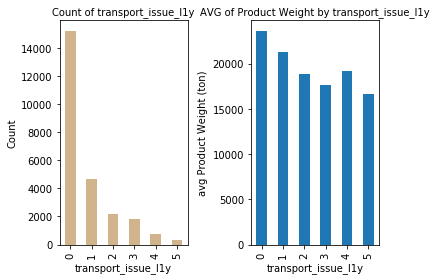

In [31]:
# Plot 2: Bar plot (as an example, a bar plot of value counts of 'transport_issue_l1y')
print("Unique values in Warehouse transport_issue_l1y" , df['transport_issue_l1y'].unique())
print('  ')
print(df.groupby('transport_issue_l1y')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2))
print('  ')

plt.subplot(1,2,1)
df['transport_issue_l1y'].value_counts().plot(kind='bar', color='tan')
plt.title('Count of transport_issue_l1y', fontsize=10)
plt.xlabel('transport_issue_l1y')
plt.ylabel('Count')
plt.subplot(1,2,2)
x = df.groupby('transport_issue_l1y')['product_wg_ton'].mean()
# Bar plot
plt.subplot(1, 2, 2)
x.plot(kind='bar')
plt.title('AVG of Product Weight by transport_issue_l1y', fontsize=10)
plt.xlabel('transport_issue_l1y')
plt.ylabel('avg Product Weight (ton)')

plt.tight_layout()
plt.show()

- The frequency distribution shows that most warehouses did not experience any transport issues in the past year.
- There is a small variation in average product weight related to transport issues, but no clear pattern emerges.

#### Competitor_in_mkt

Unique values in No. of competitors in the market [ 2  4  3  5  1  8  7  6 10  9 12  0]
  
   Competitor_in_mkt  product_wg_ton
2                  2       189918782
3                  3       158332256
4                  4       147731427
5                  5        28273370
6                  6        12452773
  


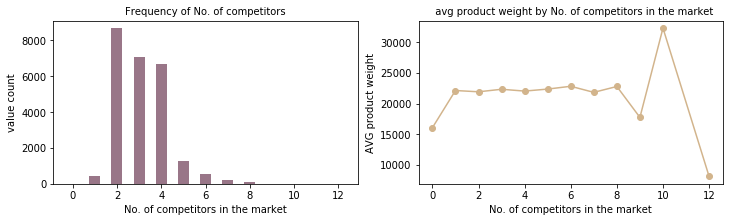

In [32]:
print("Unique values in No. of competitors in the market", df['Competitor_in_mkt'].unique())
print('  ')
print(df.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['Competitor_in_mkt'].value_counts()

plt.bar(x.index, x.values, color='#997688', width=0.5)
plt.xlabel('No. of competitors in the market')
plt.title('Frequency of No. of competitors', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('Competitor_in_mkt')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('  avg product weight by No. of competitors in the market', fontsize=10)
plt.xlabel('No. of competitors in the market')
plt.ylabel('AVG product weight')

plt.show()

- The value count plot reveals significant variation in distribution.
- Among the 8 unique values, the majority of warehouses have 2, 3, or 4 competitors, indicating these warehouses produce the highest total amount of product.
- In terms of average product weight, warehouses with no competitors have the lowest value, while the rest show no significant differences.

#### No. of Distributors

Unique values in No. of distributor [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
  
    distributor_num  product_wg_ton
16               31        10878914
26               41        10772390
54               69        10764058
6                21        10701762
14               29        10597317
  


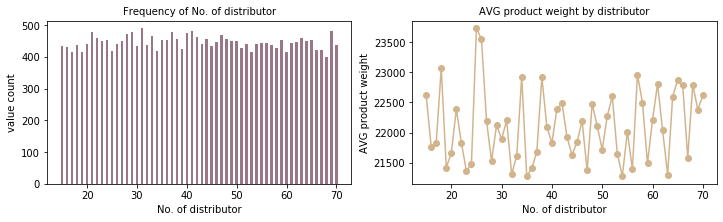

In [33]:
#distributor_num
print("Unique values in No. of distributor", df['distributor_num'].unique())
print('  ')
print(df.groupby('distributor_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['distributor_num'].value_counts()

plt.bar(x.index, x.values, color='#997688', width=0.5)
plt.xlabel('No. of distributor')
plt.title('Frequency of No. of distributor', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('distributor_num')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('AVG product weight by distributor', fontsize=10)
plt.xlabel('No. of distributor')
plt.ylabel('AVG product weight')

plt.show()

- The frequency distribution shows that the values are spread out almost evenly.
- The line plot indicates minimal variations in average product weight, ranging from 20,000 to 24,500, without any discernible pattern.

#### No. of refill request in last 3 months

Unique values in No. of refill request in last 3 months [3 0 1 7 8 4 6 5 2]
  
   num_refill_req_l3m  product_wg_ton
3                   3        67532196
5                   5        65093259
8                   8        64956287
7                   7        64004597
0                   0        63961882
  


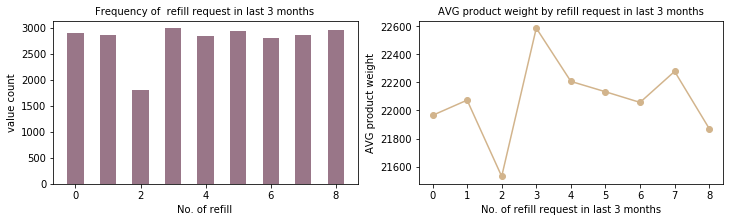

In [34]:

print("Unique values in No. of refill request in last 3 months", df['num_refill_req_l3m'].unique())
print('  ')
print(df.groupby('num_refill_req_l3m')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))


# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['num_refill_req_l3m'].value_counts()

plt.bar(x.index, x.values, color='#997688', width=0.5)
plt.xlabel('No. of refill ')
plt.title('Frequency of  refill request in last 3 months ', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('num_refill_req_l3m')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('AVG product weight by refill request in last 3 months', fontsize=10)
plt.xlabel('No. of refill request in last 3 months')
plt.ylabel('AVG product weight')

plt.show()

- The distribution of refill requests in the last 3 months is nearly uniform, with percentages of 12% and 11%, except for one value at 7%.
- The average product weight for these requests ranges from 22,000 to 24,000, showing minimal variation.
- Total product weight is positively correlated with the frequency of refill requests.

 #### Distance from hub

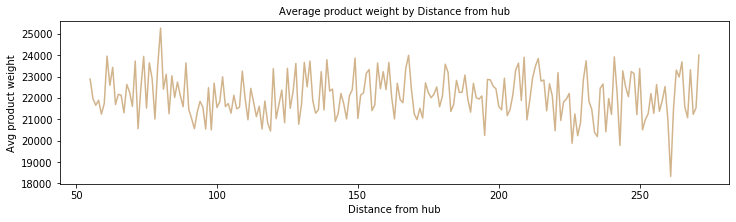

In [35]:
avg_product_weight = df.groupby('dist_from_hub')['product_wg_ton'].mean()
plt.figure(figsize=(12, 3))
plt.plot(avg_product_weight.index, avg_product_weight.values, color='tan')
plt.title('Average product weight by Distance from hub', fontsize=10)
plt.xlabel('Distance from hub')
plt.ylabel('Avg product weight')

plt.show()

- This column features a wide range of distinct values.
- The distribution of these values is fairly uniform, with the exception of the final one.
- According to the line plot, average product weights vary between 19,000 and 28,000 units, showing fluctuations without a discernible pattern.

#### Retail shop number

Unique values in No. of retail_shop [ 4651  6217  4306 ...  7768  7931 10562]
  
      retail_shop_num  product_wg_ton
1983             4816          538051
2027             4860          521480
1778             4611          502959
2085             4918          499243
2054             4887          494922
  


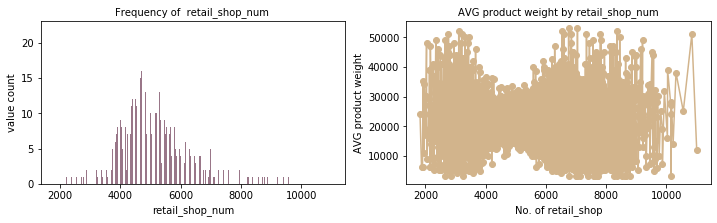

In [36]:

print("Unique values in No. of retail_shop", df['retail_shop_num'].unique())
print('  ')
print(df.groupby('retail_shop_num')['product_wg_ton'].sum().reset_index().sort_values(by='product_wg_ton', ascending=False).round(2).head())
print('  ')

plt.figure(figsize=(12, 3))

# Government certification
# plot 1
ax1 = plt.subplot2grid((1, 2), (0, 0))

x = df['retail_shop_num'].value_counts()

plt.bar(x.index, x.values, color='#997688', width=0.5)
plt.xlabel('retail_shop_num')
plt.title('Frequency of  retail_shop_num ', fontsize=10)
plt.ylabel('value count')

# #plot 2
ax2 = plt.subplot2grid((1, 2), (0, 1))

x = df.groupby('retail_shop_num')['product_wg_ton'].mean()

plt.plot(x.index, x.values, color='tan', marker='o')
plt.title('AVG product weight by retail_shop_num', fontsize=10)
plt.xlabel('No. of retail_shop')
plt.ylabel('AVG product weight')

plt.show()

- This column has the largest number of distinct values, necessitating the use of bins for graph plotting.
- Upon analyzing the table of bins versus value counts and the pie chart, the bin range from 4500 to 6000 contains the highest number of values.
- When comparing average product weight across different numbers of retail shops using a bar chart, no significant differences are observed.

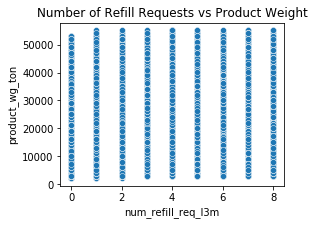

In [37]:
# Scatter plot: num_refill_req_l3m vs product_wg_ton
plt.figure(figsize=(4, 3))
sns.scatterplot(x='num_refill_req_l3m', y='product_wg_ton', data=df)
plt.title('Number of Refill Requests vs Product Weight');

1. **Pattern Observation**:
   - The scatter plot shows vertical clusters of blue dots at each integer value on the horizontal axis (number of refill requests in the last three months).
   - This suggests that refill requests occur discretely, typically at whole numbers, rather than continuously.

2. **Correlation Insights**:
   - There is no clear linear correlation between the number of refill requests and product weight.
   - Regardless of product weight, customers tend to request refills at specific intervals or quantities.

3. **Operational Implications**:
   - Understanding this pattern can help optimize inventory management and supply chain processes.
   - Consider adjusting refill quantities based on discrete demand patterns observed in warehouses.

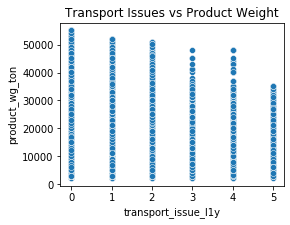

In [38]:
# Scatter plot: transport_issue_l1y vs product_wg_ton
plt.figure(figsize=(4, 3))
sns.scatterplot(x='transport_issue_l1y', y='product_wg_ton', data=df)
plt.title('Transport Issues vs Product Weight');


1. **Pattern Observation**:
   - The scatter plot shows vertical clusters of blue dots at each integer value on the horizontal axis (number of transport issues in the last year).
   - This suggests that transport issues occur discretely, typically at whole numbers.

2. **Correlation Insights**:
   - There is no clear linear correlation between the number of transport issues and product weight.
   - Regardless of product weight, warehouses experience transport issues at specific intervals or quantities.

3. **Operational Implications**:
   - Understanding this pattern can help optimize transportation logistics and address specific issues.
   - Consider adjusting transportation strategies based on discrete demand patterns observed in warehouses.



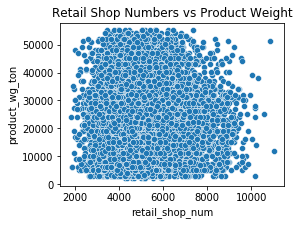

In [39]:
# Scatter plot: retail_shop_num vs product_wg_ton
plt.figure(figsize=(4, 3))
sns.scatterplot(x='retail_shop_num', y='product_wg_ton', data=df)
plt.title('Retail Shop Numbers vs Product Weight');

1. **Distribution**:
   - The scatter plot shows blue dots representing data points. These dots are randomly distributed across the graph without any clear pattern or trend.
   - There are no obvious clusters or correlations visible.

2. **Interpretation**:
   - The x-axis represents the number of retail shops (`retail_shop_num`), ranging from 0 to approximately 10,000.
   - The y-axis represents the weight of products in tons (`product_wg_ton`), ranging from 0 to approximately 50,000.
   - Based on the scatter plot, there doesn't appear to be a strong linear relationship between the number of retail shops and the product weight in tons.
   - Having more retail shops does not necessarily lead to an increase or decrease in product weight.

3. **Outliers**:
   - While most data points follow the general trend, there are a few outliers that deviate significantly from the overall pattern.



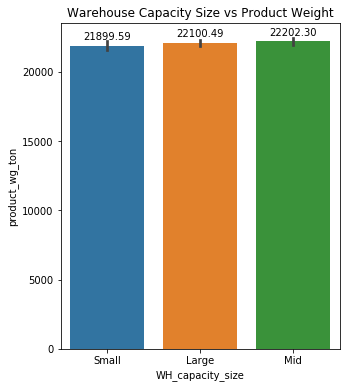

In [40]:
# Bar plot: WH_capacity_size vs product_wg_ton
plt.figure(figsize=(5, 6))
ax = sns.barplot(x='WH_capacity_size', y='product_wg_ton', data=df)

# Annotate the bars with the value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), # points vertical offset
                textcoords = 'offset points')

plt.title('Warehouse Capacity Size vs Product Weight')
plt.show()


1. **Bar Plot Description**:
   - The bar plot consists of three vertical bars, each representing a different category of warehouse capacity size: Small, Large, and Mid.
   - The y-axis represents the product weight in tons, ranging from 0 to 25,000 (in increments of 5,000).
   - The x-axis represents the warehouse capacity size (`WH_capacity_size`).

2. **Observations**:
   - **Small Capacity**:
     - The bar labeled "Small" corresponds to warehouses with a smaller capacity.
     - The product weight for this category is approximately 21,899.59 tons.

   - **Large Capacity**:
     - The bar labeled "Large" represents warehouses with a larger capacity.
     - The product weight for this category is approximately 22,100.49 tons.

   - **Mid Capacity**:
     - The bar labeled "Mid" corresponds to mid-sized warehouses.
     - The product weight for this category is approximately 22,202.30 tons.

3. **Insights**:
   - The bar plot suggests that mid-sized warehouses (`Mid` category) can handle slightly more weight compared to both small and large capacity warehouses.
   - This finding highlights the importance of optimizing warehouse capacity to efficiently handle product weight.

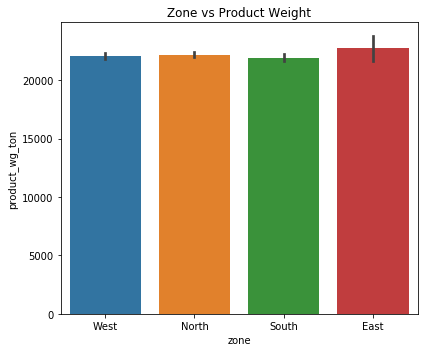

In [41]:
# Bar plot: zone vs product_wg_ton
plt.figure(figsize=(6,5 ))
sns.barplot(x='zone', y='product_wg_ton', data=df)
plt.title('Zone vs Product Weight')

plt.tight_layout()
plt.show()



1. **Zone Categories**:
   - The bar plot consists of four vertical bars, each representing a different zone: West, North, South, and East.

2. **Product Weight**:
   - The y-axis represents the product weight in tons, ranging from 0 to 25,000 (in increments of 5,000).

3. **Observations**:
   - The North zone has the highest product weight, slightly above 20,000 tons.
   - The East zone closely follows with a similar product weight.
   - The West and South zones have slightly lower product weights but are still around or above 20,000 tons.

4. **Variability**:
   - The error lines above each bar indicate some variability or uncertainty in these measurements across all zones.



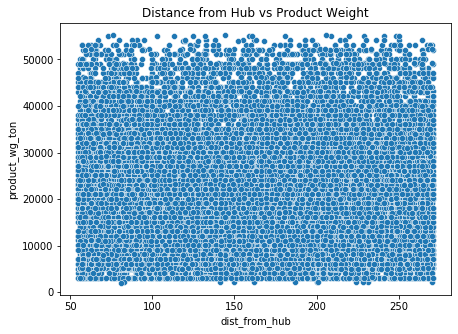

In [42]:
# Scatter plot: dist_from_hub vs product_wg_ton
plt.figure(figsize=(7, 5))
sns.scatterplot(x='dist_from_hub', y='product_wg_ton', data=df)
plt.title('Distance from Hub vs Product Weight')
plt.show()

1. **Scatter Plot Description**:
   - The graph shows blue dots (data points) scattered across the entire range.
   - The x-axis represents the distance from the hub (`dist_from_hub`), ranging from 0 to over 250.
   - The y-axis represents the product weight in tons (`product_wg_ton`), ranging from 0 to 50,000.

2. **Observations**:
   - There does not seem to be a strong correlation between the distance products are shipped from the hub and their weight.
   - The data points are evenly distributed without any clear pattern or trend.

3. **Possible Interpretations**:
   - Products of various weights may be shipped similar distances.
   - The shipping strategy might not consider product weight when determining shipping distance.

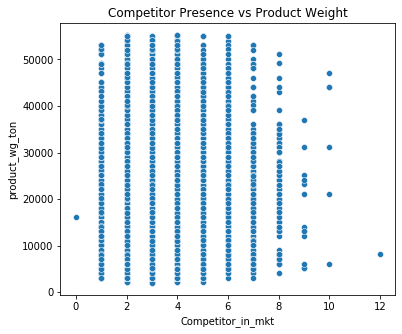

In [43]:
# scatter  plot: Competitor_in_mkt vs product_wg_ton
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Competitor_in_mkt', y='product_wg_ton', data=df)
plt.title('Competitor Presence vs Product Weight');

1. **Clusters of Data Points:**
   - We observe dense clusters of blue dots at various points along the vertical axis (product weight). This suggests that certain products have similar weights, regardless of the number of competitors in the market.

2. **Correlation Between Competitor Presence and Product Weight:**
   - We can explore whether there's any correlation between competitor presence (horizontal axis) and product weight (vertical axis).
   - If there's a positive correlation, it would imply that as the number of competitors increases, product weight tends to increase (or vice versa).
   - Conversely, a negative correlation would suggest an inverse relationship.

3. **Outliers:**
   - Investigating these outliers could provide valuable insights into market dynamics.

4. **Market Segmentation:**
   - Consider segmenting the data based on competitor presence and analyzing product weight within each segment.
 

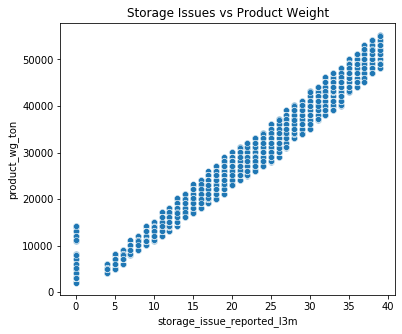

In [44]:
# Bivariate plot: storage_issue_reported_l3m vs product_wg_ton
plt.figure(figsize=(6, 5))
sns.scatterplot(x='storage_issue_reported_l3m', y='product_wg_ton', data=df)
plt.title('Storage Issues vs Product Weight');

1. **Positive Correlation:**
   - The scatter plot shows a clear upward trend, indicating a positive correlation between the number of storage issues reported in the last three months and the product weight.
   - As product weight increases, the number of storage issues tends to rise. Heavier products appear to be more prone to storage problems.

2. **Focus on Hotspots:**
   - Storage insights allow you to identify hotspots—areas where storage issues are more prevalent.
   - By drilling down into specific storage accounts, you can diagnose issues related to availability, performance, failures, and capacity.

3. **Customization and Metrics:**
   - You can customize the metrics you want to see and set thresholds aligned with your limits.
   - Charts from the insights can be pinned to an Azure dashboard for easy monitoring.

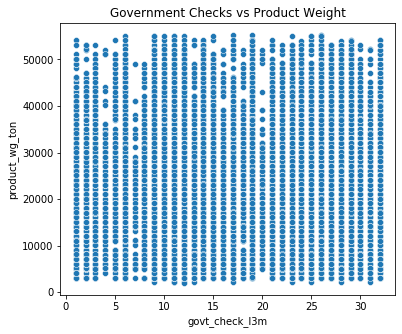

In [45]:
# scatter  plot: govt_check_l3m vs product_wg_ton
plt.figure(figsize=(6, 5))
sns.scatterplot(x='govt_check_l3m', y='product_wg_ton', data=df)
plt.title('Government Checks vs Product Weight');


The data points in the scatter plot appear to be densely distributed across the entire range of both axes. However, there doesn't seem to be a clear pattern or trend indicating a strong correlation between government checks and product weight. 


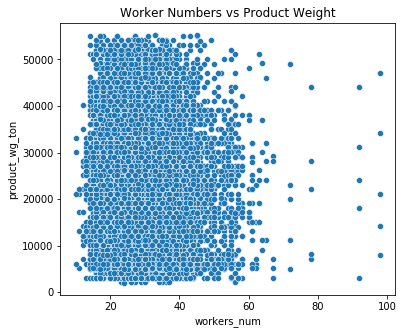

In [46]:
# scatter plot: workers_num vs product_wg_ton
plt.figure(figsize=(6, 5))
sns.scatterplot(x='workers_num', y='product_wg_ton', data=df)
plt.title('Worker Numbers vs Product Weight');


The scatter plot shows a downward trend: as the number of workers increases, the product weight decreases. This suggests an inverse relationship between the number of workers and productivity per worker. Such insights can be valuable for studying workforce efficiency or organizational behavior¹.


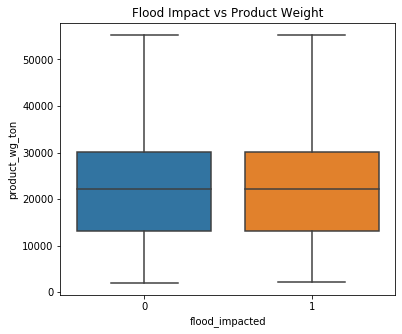

In [47]:
# Box plot: flood_impacted vs product_wg_ton
plt.figure(figsize=(6, 5))
sns.boxplot(x='flood_impacted', y='product_wg_ton', data=df)
plt.title('Flood Impact vs Product Weight');


1. **Median Product Weight**:
   - For both flood-impacted ('1') and non-flood-impacted ('0') products, the median weight is around 30,000 tons.
   - Flood-impacted products tend to have slightly higher median weight (closer to 35,000 tons).

2. **Interquartile Range (IQR)**:
   - The IQR for flood-impacted products is wider, ranging from approximately 25,000 to 45,000 tons.
   - Non-flood-impacted products have a narrower IQR, spanning roughly 20,000 to 40,000 tons.

3. **Outliers**:
   - No visible outliers in either group.

Text(0.5, 1.0, 'Electric Supply vs Product Weight')

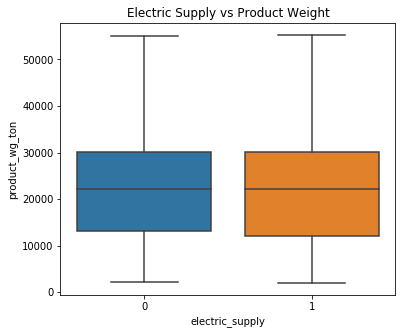

In [48]:
# Box plot: electric_supply vs product_wg_ton
plt.figure(figsize=(6, 5))
sns.boxplot(x='electric_supply', y='product_wg_ton', data=df)
plt.title('Electric Supply vs Product Weight')


1. **Median Product Weight**:
   - For both electric supply categories ('0' and '1'), the median weight is around 30,000 tons.
   - Electric supply status '1' tends to have a slightly higher median weight (closer to mid-30,000s).

2. **Interquartile Range (IQR)**:
   - The IQR for electric supply status '1' is wider, ranging from approximately above the median of status '0' to well over its upper quartile.
   - Status '0' has a narrower IQR, spanning roughly 20,000 to 40,000 tons.

3. **Outliers**:
   - No visible outliers in either electric supply category.

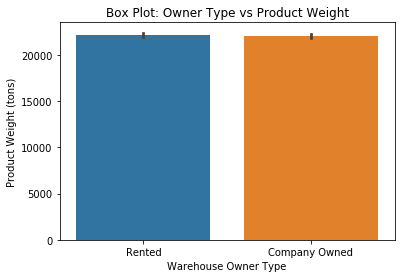

In [49]:
# Box plot of Owner Type  vs Product Weight 
plt.figure(figsize=(6, 4))
sns.barplot(x='wh_owner_type', y='product_wg_ton', data=df)
plt.title('Box Plot: Owner Type vs Product Weight')
plt.xlabel('Warehouse Owner Type')
plt.ylabel('Product Weight (tons)')
plt.show()


1. **Product Weight**:
   - Both rented and company-owned warehouses have a product weight of 20,000 tons.
   - The blue bar represents rented warehouses, and the orange bar represents company-owned warehouses.

2. **Roles in Product Development**:
   - **Product Managers (PMs)** define the vision and strategy based on market needs.
   - **Product Owners (POs)** translate this vision into actionable tasks for development teams, focusing on execution and delivery.

3. **Collaboration**:
   - Success in product development requires a deep collaboration between PMs and POs.
   - PMs focus on the 'what' and 'why,' while POs handle the 'how' and 'when.'


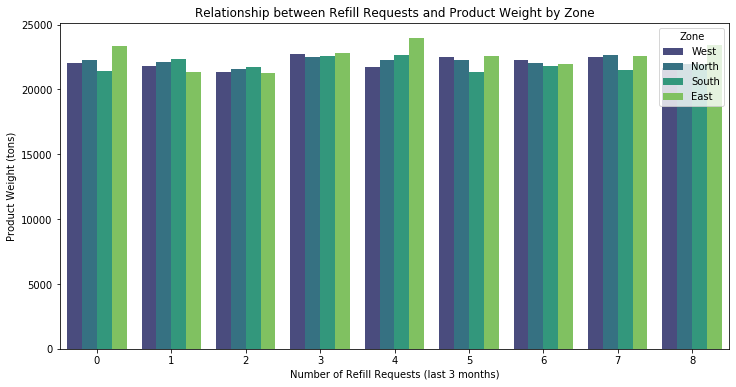

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Joint plot with categorical variable
plt.figure(figsize=(12, 6))
sns.barplot(x='num_refill_req_l3m', y='product_wg_ton', hue='zone', data=df, palette='viridis', errorbar=None)
plt.title('Relationship between Refill Requests and Product Weight by Zone')
plt.xlabel('Number of Refill Requests (last 3 months)')
plt.ylabel('Product Weight (tons)')
plt.legend(title='Zone')
plt.show()


1. **Refill Requests and Product Weight Correlation:**
   - Across all zones (West, North, South, and East), there's a positive correlation between the number of refill requests and product weight. As the number of refill requests increases, the product weight tends to rise.
   - This suggests that higher demand (more refill requests) corresponds to increased product weight.

2. **Zone-Specific Observations:**
   - West Zone: The product weight is highest for 7 refill requests.
   - North Zone: The product weight peaks at 4 refill requests.
   - South Zone: The highest product weight occurs at 5 refill requests.
   - East Zone: The product weight is greatest for 7 refill requests.

3. **Supply Chain Implications:**
   - Understanding these patterns can help optimize inventory management. For example, ensuring sufficient stock for peak refill request periods in each zone.
   - It's essential to balance product weight with efficient supply chain logistics to meet demand effectively.


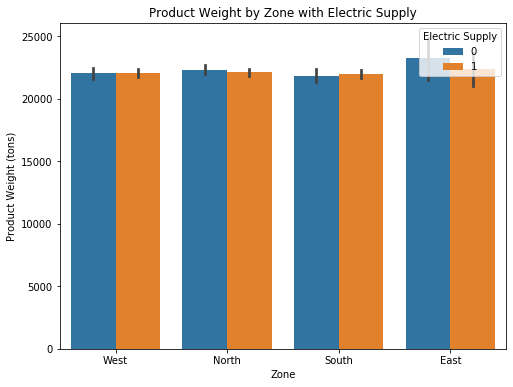

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x='zone', y='product_wg_ton', hue='electric_supply', data=df)
plt.title('Product Weight by Zone with Electric Supply')
plt.xlabel('Zone')
plt.ylabel('Product Weight (tons)')
plt.legend(title='Electric Supply', loc='upper right')
plt.show()



1. **Electric Supply Impact:**
   - The chart compares product weights across four zones (West, North, South, and East) based on two categories of electric supply: '0' and '1'.
   - Interestingly, the presence or absence of electric supply doesn't seem to significantly affect product weight in any specific zone.

2. **Zone-Specific Observations:**
   - West Zone: Product weight is consistent regardless of electric supply.
   - North Zone: Similar pattern—electric supply doesn't strongly influence product weight.
   - South Zone: Again, no substantial difference in product weight based on electric supply.
   - East Zone: Product weight remains steady regardless of electric supply status.

3. **Logistical Considerations:**
   - For supply chain planning, it appears that electric supply isn't a critical factor affecting product weight in these zones.
   - Other factors (e.g., demand, transportation, storage) might play a more significant role.


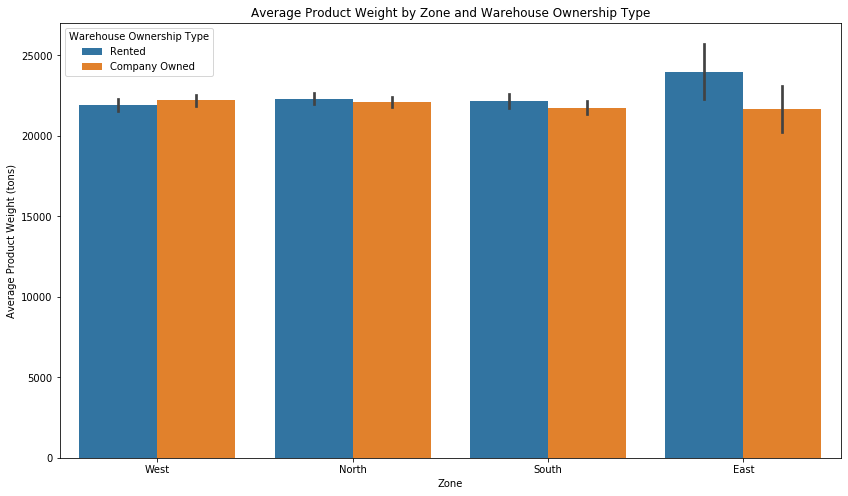

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Multivariate Bar Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='zone', y='product_wg_ton', hue='wh_owner_type', data=df)
plt.title('Average Product Weight by Zone and Warehouse Ownership Type')
plt.xlabel('Zone')
plt.ylabel('Average Product Weight (tons)')
plt.legend(title='Warehouse Ownership Type')
plt.show()


1. **Warehouse Ownership Impact:**
   - The chart compares average product weights across five zones: West, North, South, East, and Central.
   - It further distinguishes between two types of warehouse ownership: "Rented" (in orange) and "Company Owned" (in blue).

2. **Observations:**
   - Across all zones, company-owned warehouses tend to handle a higher average product weight compared to rented warehouses.
   - The East zone consistently shows the highest average product weight for both ownership types.

3. **Logistics Considerations:**
   - When planning logistics or optimizing warehouse operations, understanding these patterns can be crucial.
   - Company-owned warehouses might be better suited for heavier products, while rented warehouses could focus on lighter items.


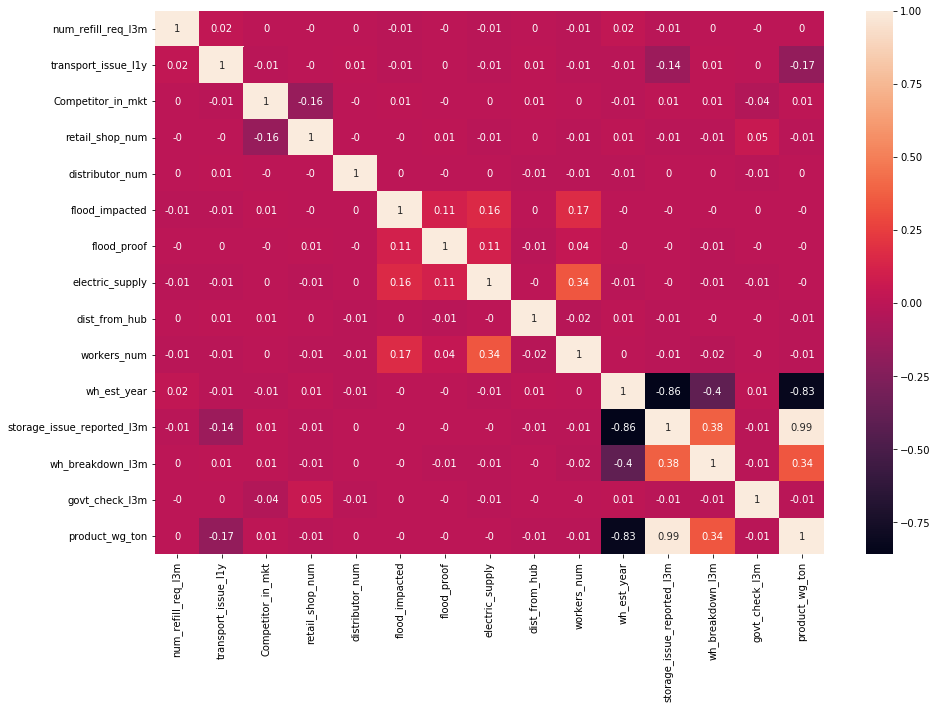

In [53]:
#find correlation and it put into cr variable ,round it for 2 values after the decimal point
cr=df.corr()
round(cr,2)
# plot heat map 
plt.figure(figsize=(15,10))
sns.heatmap(round(cr,2),annot=True)

1. **Positive Correlation:**
   - There is a high positive correlation (0.99) between "storage issue reported in the last 3 months" and "product weight (ton)." This suggests that as storage issues increase, product weight tends to increase as well.
   
2. **Negative Correlations:**
   - A very negative correlation (-0.86) exists between "storage issue reported in the last 3 months" and "warehouse establishment year." This implies that newer warehouses tend to have fewer storage issues.
   - Most variables exhibit negative correlations with each other. For example, "transport issue reliability," "electric supply reliability," and "flood impact" all negatively correlate with other variables.

3. **Insights:**
   - The negative correlations may indicate potential areas for improvement. For instance, addressing transport reliability or ensuring consistent electric supply could reduce storage issues.
   - Investigate why newer warehouses experience fewer storage issues. it due to better infrastructure or management practices
   - Consider exploring other factors that might influence storage issues, such as workforce conditions, competitor presence, or government checks.


### c) Removal of unwanted variables (if applicable) b) Missing Value treatment (if applicable

In [54]:
# display number of unique values in each column

df.nunique().sort_values(ascending=False)

Ware_house_ID                   25000
WH_Manager_ID                   25000
retail_shop_num                  4906
product_wg_ton                   4561
dist_from_hub                     217
workers_num                        60
distributor_num                    56
storage_issue_reported_l3m         37
govt_check_l3m                     32
wh_est_year                        28
Competitor_in_mkt                  12
num_refill_req_l3m                  9
wh_breakdown_l3m                    7
WH_regional_zone                    6
transport_issue_l1y                 6
approved_wh_govt_certificate        5
zone                                4
WH_capacity_size                    3
wh_owner_type                       2
flood_impacted                      2
flood_proof                         2
Location_type                       2
electric_supply                     2
temp_reg_mach                       2
dtype: int64

In [55]:
#drop 'Ware_house_ID', 'WH_Manager_ID'
df_cat.drop(['Ware_house_ID', 'WH_Manager_ID'],axis=1, inplace = True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [57]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [58]:
#missing value treatment
df_num.isnull().sum()

num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
wh_est_year                   11881
storage_issue_reported_l3m        0
temp_reg_mach                     0
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [59]:
df.workers_num.describe()

count    24010.000000
mean        28.944398
std          7.872534
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64

In [60]:
df.wh_est_year.describe()

count    13119.000000
mean      2009.383185
std          7.528230
min       1996.000000
25%       2003.000000
50%       2009.000000
75%       2016.000000
max       2023.000000
Name: wh_est_year, dtype: float64

In [61]:
df.approved_wh_govt_certificate.describe()

count     24092
unique        5
top           C
freq       5501
Name: approved_wh_govt_certificate, dtype: object

In [62]:
def percentage_of_zeros(df):
    zero_counts =df.isnull().sum()  # Count zeros in each column
    total_counts = len(df)  # Total number of rows in each column
    zero_percentage = (zero_counts / total_counts) * 100  # Calculate percentage
    return zero_percentage

# Apply the function and print the results
zero_percentage = percentage_of_zeros(df)
print(zero_percentage)

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64


47% of the wh_est_year column contains zeros, this indicates that 47% of the warehouses have not been established for more than a year,47% zeros we can drop that column

In [63]:
df_num['wh_est_year'] = 2024 - df_num['wh_est_year']  # Converting to age
df_num.rename(columns={'wh_est_year': 'wh_age'}, inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
# Replace missing values with the median of each column
df_num.fillna(df_num.median(), inplace=True)


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [65]:
df_num.isnull().sum()

num_refill_req_l3m            0
transport_issue_l1y           0
Competitor_in_mkt             0
retail_shop_num               0
distributor_num               0
flood_impacted                0
flood_proof                   0
electric_supply               0
dist_from_hub                 0
workers_num                   0
wh_age                        0
storage_issue_reported_l3m    0
temp_reg_mach                 0
wh_breakdown_l3m              0
govt_check_l3m                0
product_wg_ton                0
dtype: int64

In [66]:
# Corrected code to fill missing values with the mode
df_cat['approved_wh_govt_certificate'] = df_cat['approved_wh_govt_certificate'].fillna(df_cat['approved_wh_govt_certificate'].mode()[0])


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
df_num["wh_age"].describe()

count    25000.000000
mean        14.798920
std          5.456731
min          1.000000
25%         14.000000
50%         15.000000
75%         15.000000
max         28.000000
Name: wh_age, dtype: float64

In [68]:
df_num.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_age',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

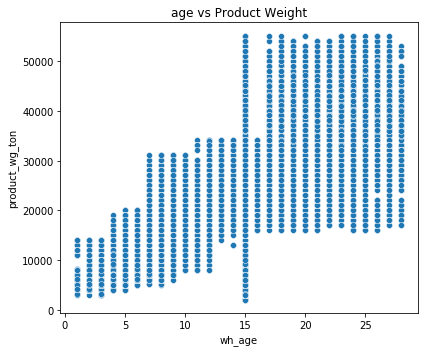

In [69]:
# Bar plot: zone vs product_wg_ton
plt.figure(figsize=(6,5 ))
sns.scatterplot(x='wh_age', y='product_wg_ton', data=df_num)
plt.title('age vs Product Weight')

plt.tight_layout()
plt.show()

### d) Outlier treatment (if required) 

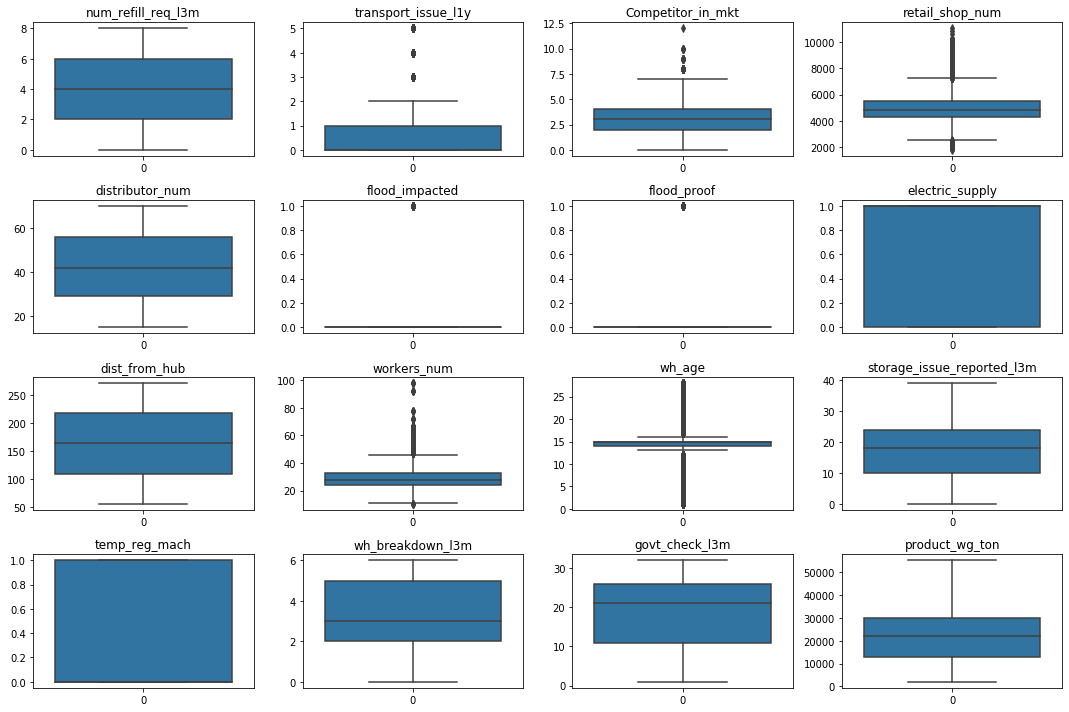

In [70]:
# Histograms for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(df_num, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df_num[var])
    plt.title(var)
plt.tight_layout()
plt.show()

In [71]:
def remove_outlier(df_num):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR
    return low,upper

In [72]:
for i in df_num.columns:
    lw,hi=remove_outlier(df_num[i])
    df_num[i]=np.where(df_num[i]<lw,lw,df_num[i])
    df_num[i]=np.where(df_num[i]>hi,hi,df_num[i])

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


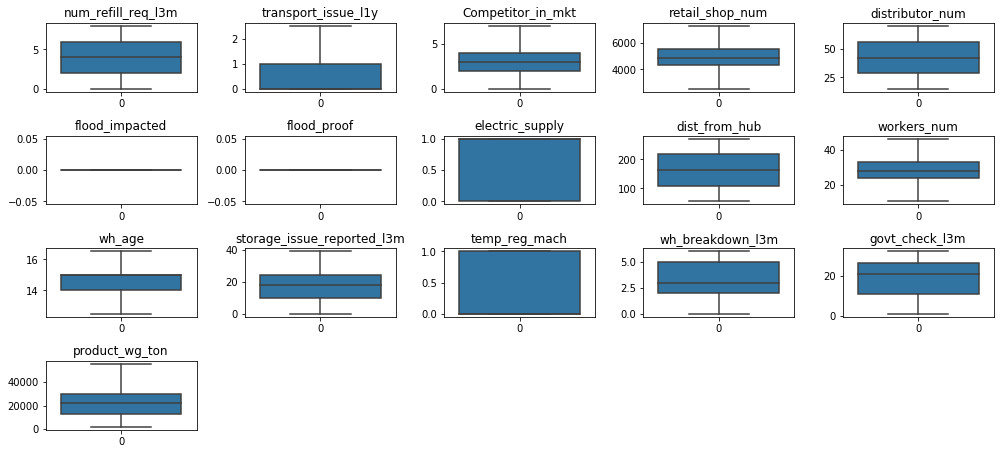

In [73]:
# after checking outliers
plt.figure(figsize = (14,14))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(9, 5, i + 1)
    sns.boxplot( df_num[feature_list[i]])
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

In [74]:
df_num

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                     3.0                  1.0                2.0   
1                     0.0                  0.0                4.0   
2                     1.0                  0.0                4.0   
3                     7.0                  2.5                2.0   
4                     3.0                  1.0                2.0   
...                   ...                  ...                ...   
24995                 3.0                  0.0                4.0   
24996                 6.0                  0.0                4.0   
24997                 7.0                  0.0                2.0   
24998                 1.0                  0.0                2.0   
24999                 8.0                  2.0                4.0   

       retail_shop_num  distributor_num  flood_impacted  flood_proof  \
0               4651.0             24.0             0.0          0.0   
1               6217.0             47.0             0.0          0.0   
2               4306.0             64.0             0.0          0.0   
3               6000.0             50.0             0.0          0.0   
4               4740.0             42.0             0.0          0.0   
...                ...              ...             ...          ...   
24995           5390.0             19.0             0.0          0.0   
24996           4490.0             57.0             0.0          0.0   
24997           5403.0             31.0             0.0          0.0   
24998           7280.5             25.0             0.0          0.0   
24999           5664.0             21.0             0.0          0.0   

       electric_supply  dist_from_hub  workers_num  wh_age  \
0                  1.0           91.0         29.0    15.0   
1                  1.0          210.0         31.0    15.0   
2                  0.0          161.0         37.0    15.0   
3                  0.0          103.0         21.0    15.0   
4                  1.0          112.0         25.0    15.0   
...                ...            ...          ...     ...   
24995              1.0          142.0         34.0    16.5   
24996              1.0          130.0         28.0    12.5   
24997              1.0          147.0         28.0    15.0   
24998              1.0           60.0         25.0    15.0   
24999              1.0          239.0         39.0    12.5   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                            13.0            0.0               5.0   
1                             4.0            0.0               3.0   
2                            17.0            0.0               6.0   
3                            17.0            1.0               3.0   
4                            18.0            0.0               6.0   
...                           ...            ...               ...   
24995                        22.0            1.0               2.0   
24996                        10.0            0.0               4.0   
24997                        23.0            0.0               5.0   
24998                        18.0            0.0               6.0   
24999                         4.0            0.0               2.0   

       govt_check_l3m  product_wg_ton  
0                15.0         17115.0  
1                17.0          5074.0  
2                22.0         23137.0  
3                27.0         22115.0  
4                24.0         24071.0  
...               ...             ...  
24995            30.0         32093.0  
24996            18.0         12114.0  
24997            25.0         27080.0  
24998            30.0         25093.0  
24999            11.0          5058.0  

[25000 rows x 16 columns]

In [75]:
df_num.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_age',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [76]:
df= pd.concat([df_num, df_cat], axis=1)

In [77]:
df.isnull().sum()

num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_age                          0
storage_issue_reported_l3m      0
temp_reg_mach                   0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
wh_owner_type                   0
approved_wh_govt_certificate    0
dtype: int64

#### Steps to Check for Imbalance:

Descriptive Statistics: Summary statistics for the target variable.
Histogram/Boxplot: Visualize the distribution of the target variable.
Frequency Counts: For categorical variables to check for imbalance.

To determine if the data is unbalanced, we need to analyze the distribution of the target variable product_wg_ton. Here's how to check for imbalance and what can be done if it exists:

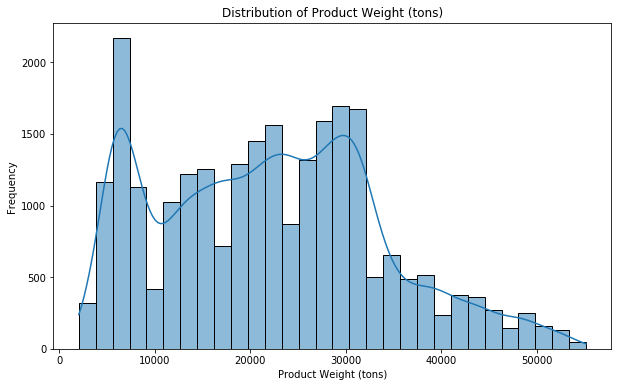

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['product_wg_ton'], kde=True, bins=30)
plt.title('Distribution of Product Weight (tons)')
plt.xlabel('Product Weight (tons)')
plt.ylabel('Frequency')
plt.show()



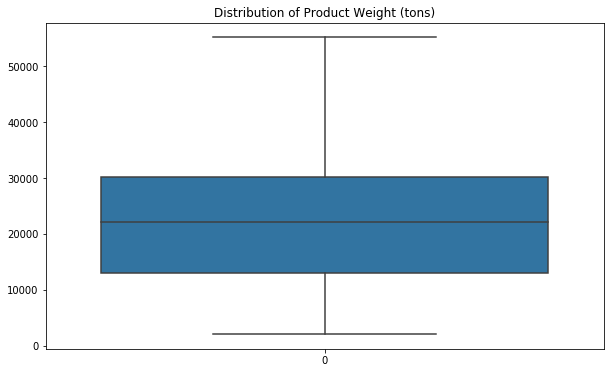

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['product_wg_ton'])
plt.title('Distribution of Product Weight (tons)')

plt.show()


If the distribution is roughly uniform or follows a normal distribution, the data is considered balanced.

### What to Do If the Data Is Unbalanced:

##### 1-Resampling Techniques:

Oversampling: Increase the number of samples in the minority classes (e.g., SMOTE - Synthetic Minority Over-sampling Technique).
Undersampling: Reduce the number of samples in the majority classes.

##### 2-Data Transformation:

Apply transformations (e.g., log transformation) to normalize the distribution

##### 3-Using Appropriate Metrics:

Use evaluation metrics suitable for imbalanced data, such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) instead of accuracy.



In [80]:
# ANOVA for categorical variables
from scipy.stats import f_oneway
categorical_features = df.select_dtypes(include=['object']).columns
anova_results = {}
for cat in categorical_features:
    unique_values = df[cat].unique()
    grouped_data = [df[df[cat] == val]['product_wg_ton'] for val in unique_values]
    f_val, p_val = f_oneway(*grouped_data)
    anova_results[cat] = p_val

# Filtering significant categorical variables
significant_categorical = {k: v for k, v in anova_results.items() if v < 0.05}

In [81]:
significant_categorical

{'Location_type': 3.639842569002911e-32,
 'approved_wh_govt_certificate': 1.550048556967167e-306}

location type is more significant categorical variable 

### b) Any business insights using clustering (if applicable) 

In [82]:
df.isnull().sum()

num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_age                          0
storage_issue_reported_l3m      0
temp_reg_mach                   0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
wh_owner_type                   0
approved_wh_govt_certificate    0
dtype: int64

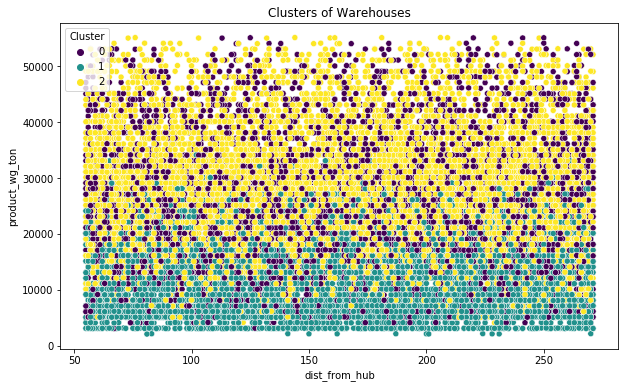

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use only numerical features for clustering
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['product_wg_ton'])

# Standardize the features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(numerical_features_scaled)

# Add clusters to the dataframe
df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dist_from_hub', y='product_wg_ton', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Warehouses')
plt.show()


In [84]:
df.drop("Cluster",axis=1,inplace=True)


1. **Resource Allocation Optimization**:
   - **Purple Cluster**: These nearby warehouses with low product weights are ideal for handling smaller shipments or fast-moving goods. Efficiently allocate resources for quick distribution.
   - **Yellow Cluster**: Warehouses farther from the hub can accommodate larger shipments or slower-moving products. Adjust resource allocation based on transportation capacity and delivery times.
   - **Green Cluster**: Regardless of distance, these warehouses handle heavier products. Optimize storage capacity and transportation routes for efficient handling.

2. **Market Segmentation**:
   - Clusters likely represent different regions or market segments.
   - Analyze demand patterns, customer preferences, and product types within each cluster.
   - Tailor marketing strategies and inventory management accordingly.

3. **Supply Chain Efficiency**:
   - Use cluster insights to streamline supply chain logistics.
   - Prioritize distribution based on proximity, product weight, and demand.
   - Aim to minimize transportation costs and enhance overall efficiency.



## business insights

### Insights:

#### Data Distribution:
1. **Warehouse IDs & Manager IDs**:
   - The distribution of both warehouse IDs and manager IDs is relatively uniform, indicating balanced product distribution and managerial oversight.

2. **Location Type**:
   - A majority of warehouses are in rural areas, receiving 90.76% of the total product weight, compared to 9.24% for urban areas.

3. **Warehouse Capacity Size**:
   - Large capacity warehouses have the highest count, followed by mid and small. Mid-sized warehouses handle slightly more product weight.

4. **Zones**:
   - Zone 6 has the highest count of warehouses, while Zone 1 has the lowest. The North Zone has the highest product weight, followed by the East Zone.

5. **Ownership Type**:
   - 54% of warehouses are company-owned, handling a slightly higher total product weight compared to rented warehouses.

6. **Temperature Regulating Machines & Electric Supply**:
   - Warehouses with temperature regulating machines and accessible electric supply manage higher product weights.

7. **Government Checks**:
   - As the frequency of government checks increases, the total product weight also increases, though the average weight remains stable.

#### Correlations and Patterns:
1. **Storage Issues**:
   - Strong positive correlation with product weight: As product weight increases, so do storage issues.

2. **Warehouse Breakdowns**:
   - Positive correlation with product weight: Higher product weights lead to more frequent breakdowns.

3. **Transport Issues**:
   - No clear linear correlation with product weight: Transport issues occur discretely, regardless of product weight.

4. **Number of Competitors**:
   - Warehouses with more competitors tend to have higher product weights.

5. **Refill Requests**:
   - Positive correlation with product weight: More refill requests correspond to higher product weights.

6. **Flood Impact**:
   - Flood-impacted warehouses have slightly higher median product weights.

7. **Warehouse Establishment Year**:
   - Newer warehouses tend to have fewer storage issues.

#### Specific Observations:
1. **Distance from Hub**:
   - No strong correlation with product weight: Products of various weights are shipped similar distances.

2. **Number of Workers**:
   - Inverse relationship with productivity: As the number of workers increases, product weight per worker decreases.

### Recommendations:

1. **Inventory Optimization**:
   - Implement demand forecasting models to align supply with regional demand, reducing overstock and stockouts.
   - Use historical data to predict refill requests and adjust supply accordingly.

2. **Warehouse Management**:
   - Focus on improving infrastructure and management practices in older warehouses to reduce storage issues.
   - Invest in temperature regulating machines and reliable electric supply for warehouses to handle higher product weights more efficiently.

3. **Transportation and Logistics**:
   - Optimize transportation routes and strategies based on discrete transport issue patterns.
   - Prioritize warehouses closer to the production hub for faster distribution of lighter shipments and those farther away for larger shipments.

4. **Targeted Marketing**:
   - Use regional demand patterns to drive advertisement campaigns, focusing on zones with higher product weight and refill requests.
   - Tailor marketing strategies based on competitor presence and regional demand insights.

5. **Government Compliance**:
   - Ensure warehouses adhere to government regulations to avoid frequent checks and potential disruptions.
   - Focus on obtaining higher government approval certificates to increase product handling efficiency.

6. **Resource Allocation**:
   - Allocate resources efficiently based on warehouse capacity size and product weight handling capabilities.
   - Balance workforce allocation to optimize productivity per worker.

7. **Risk Management**:
   - Prepare flood-prone warehouses with flood-proof infrastructure to mitigate risks and ensure steady product weight management.

By addressing these areas, the company can optimize supply quantities, reduce inventory costs, and enhance overall efficiency in the supply chain.

# NOTE-2

## 1. Model building and interpretation.
* a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)

* b. Test your predictive model against the test set using various appropriate performance metrics c.Interpretation of the model(s)

In [85]:
df.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_age',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

## splitting

In [86]:
#split data
y=df['product_wg_ton']
x=df.drop('product_wg_ton', axis=1)

In [87]:
# Encode categorical variables
x= pd.get_dummies(x, drop_first=True)

In [88]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               25000 non-null  float64
 1   transport_issue_l1y              25000 non-null  float64
 2   Competitor_in_mkt                25000 non-null  float64
 3   retail_shop_num                  25000 non-null  float64
 4   distributor_num                  25000 non-null  float64
 5   flood_impacted                   25000 non-null  float64
 6   flood_proof                      25000 non-null  float64
 7   electric_supply                  25000 non-null  float64
 8   dist_from_hub                    25000 non-null  float64
 9   workers_num                      25000 non-null  float64
 10  wh_age                           25000 non-null  float64
 11  storage_issue_reported_l3m       25000 non-null  float64
 12  temp_reg_mach     

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 3. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_data.sort_values(by = 'VIF', ascending = False)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


feature         VIF
16             WH_capacity_size_Mid         inf
21          WH_regional_zone_Zone 2         inf
22          WH_regional_zone_Zone 3         inf
23          WH_regional_zone_Zone 4         inf
10                           wh_age  104.133266
3                   retail_shop_num   25.911839
18                       zone_North   20.843749
9                       workers_num   19.047966
20                        zone_West   15.897411
19                       zone_South   13.673816
2                 Competitor_in_mkt    9.989522
4                   distributor_num    7.819505
8                     dist_from_hub    7.647369
11       storage_issue_reported_l3m    7.335568
14                   govt_check_l3m    7.334576
25          WH_regional_zone_Zone 6    7.026745
13                 wh_breakdown_l3m    6.227774
24          WH_regional_zone_Zone 5    5.831291
0                num_refill_req_l3m    3.745005
7                   electric_supply    3.442610
17           WH_capacity_size_Small    2.945385
30   approved_wh_govt_certificate_C    2.449164
27  approved_wh_govt_certificate_A+    2.228702
29  approved_wh_govt_certificate_B+    2.039122
28   approved_wh_govt_certificate_B    2.019819
12                    temp_reg_mach    1.967171
26             wh_owner_type_Rented    1.965619
1               transport_issue_l1y    1.602915
15              Location_type_Urban    1.098040
5                    flood_impacted         NaN
6                       flood_proof         NaN

In [90]:
# Create a list of columns with VIF greater than 20
columns_to_drop = vif_data[vif_data['VIF'] > 20]['feature'].tolist()

# Drop these columns from DataFrame X
x = x.drop(columns=columns_to_drop)

In [91]:
# 3. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_data.sort_values(by = 'VIF', ascending = False)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


feature        VIF
8                       workers_num  15.270540
2                 Competitor_in_mkt   8.868811
3                   distributor_num   7.122605
7                     dist_from_hub   6.997108
12                   govt_check_l3m   6.120019
11                 wh_breakdown_l3m   6.031098
9        storage_issue_reported_l3m   5.409967
0                num_refill_req_l3m   3.652273
6                   electric_supply   3.437725
23   approved_wh_govt_certificate_C   2.283411
20  approved_wh_govt_certificate_A+   2.177838
22  approved_wh_govt_certificate_B+   1.969194
10                    temp_reg_mach   1.965343
21   approved_wh_govt_certificate_B   1.952503
16                        zone_West   1.927242
19             wh_owner_type_Rented   1.894903
18          WH_regional_zone_Zone 6   1.817134
15                       zone_South   1.683773
1               transport_issue_l1y   1.541208
14           WH_capacity_size_Small   1.469218
17          WH_regional_zone_Zone 5   1.451381
13              Location_type_Urban   1.097667
4                    flood_impacted        NaN
5                       flood_proof        NaN

In [92]:
#split data using scaled data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [93]:
x_train.shape

(17500, 24)

## Scaling

In [94]:
# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Modelling
### Regression Models
## Linear Regression

In [96]:
# Initialize the model

LRmodel = LinearRegression()

In [97]:
# Fit model to the training data

LRmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# Make predictions on the train data

LR_predicted = LRmodel.predict(x_train)

In [99]:
# Evaluate train the model

# r2 score
lr_r2 = r2_score(y_train, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(y_train, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(y_train, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   0.985
Root Mean Squared Error:   1405.222
Mean Absolute Error:   1011.428


In [100]:
# Make predictions on the test data

LR_predicted = LRmodel.predict(x_test)

In [101]:
# Evaluate train the model

# r2 score
lr_r2 = r2_score(y_test, LR_predicted).round(3)
print('R2 score:  ', lr_r2)

# root mean squared error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(y_test, LR_predicted)).round(3)
print('Root Mean Squared Error:  ', lr_rmse) 

# mean absolute error (MAE)
lr_mae = mean_absolute_error(y_test, LR_predicted).round(3)
print('Mean Absolute Error:  ', lr_mae)


R2 score:   0.986
Root Mean Squared Error:   1339.209
Mean Absolute Error:   996.659


# Decision Tree

In [102]:
# Initialize the model

DTmodel = DecisionTreeRegressor(random_state = 0) 

In [103]:
# Fit model to the training data

DTmodel.fit(x_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [104]:
# Make predictions on the train data

DT_predicted = DTmodel.predict(x_train)

In [105]:
# Evaluate  the model

# r2 score
dt_r2 = r2_score(y_train, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(y_train, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(y_train, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)


R2 score:   1.0
Root Mean Squared Error:   0.0
Mean Absolute Error:   0.0


In [106]:
# Make predictions on the test data

DT_predicted = DTmodel.predict(x_test)

In [107]:
# Evaluate  the model

# r2 score
dt_r2 = r2_score(y_test, DT_predicted).round(3)
print('R2 score:  ', dt_r2)

# root mean squared error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(y_test, DT_predicted)).round(3)
print('Root Mean Squared Error:  ', dt_rmse) 

# mean absolute error (MAE)
dt_mae = mean_absolute_error(y_test, DT_predicted).round(3)
print('Mean Absolute Error:  ', dt_mae)

R2 score:   0.987
Root Mean Squared Error:   1323.145
Mean Absolute Error:   879.195


# Random Forest

In [108]:
# Initialize the model

RFmodel = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0) 

In [109]:
# Fit model to the training data

RFmodel.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [110]:
# Make predictions on the train data

RF_predicted = RFmodel.predict(x_train)

In [111]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(y_train, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_train, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(y_train, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)


R2 score:   0.979
Root Mean Squared Error:   1685.372
Mean Absolute Error:   1291.076


In [112]:
# Make predictions on the test data

RF_predicted = RFmodel.predict(x_test)

In [113]:
# Evaluate  the model

# r2 score
rf_r2 = r2_score(y_test, RF_predicted).round(3)
print('R2 score:  ', rf_r2)

# root mean squared error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_test, RF_predicted)).round(3)
print('Root Mean Squared Error:  ', rf_rmse) 

# mean absolute error (MAE)
rf_mae = mean_absolute_error(y_test, RF_predicted).round(3)
print('Mean Absolute Error:  ', rf_mae)

R2 score:   0.979
Root Mean Squared Error:   1661.089
Mean Absolute Error:   1278.529


### Ridge Model

In [114]:
# Importing necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fitting the Ridge regression model on the training data
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

# Making predictions on the training set
train_predictions = ridge.predict(x_train)

# Calculating R-squared, RMSE, and MAE for the training set
train_r2 = ridge.score(x_train, y_train)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)

# Displaying the training set metrics
print("Training Set Metrics:")
print(f"R-squared: {train_r2}")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")

# Making predictions on the testing set
test_predictions = ridge.predict(x_test)

# Calculating R-squared, RMSE, and MAE for the testing set
test_r2 = ridge.score(x_test, y_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)

# Displaying the testing set metrics
print("\nTesting Set Metrics:")
print(f"R-squared: {test_r2}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")


Training Set Metrics:
R-squared: 0.9854379433399502
RMSE: 1405.2221343627446
MAE: 1011.4223858892582

Testing Set Metrics:
R-squared: 0.9864851972261877
RMSE: 1339.2070319258046
MAE: 996.6456842143539


### Lasso model

In [115]:
# Importing necessary libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fitting the Lasso regression model on the training data
lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)

# Making predictions on the training set
train_predictions = lasso.predict(x_train)

# Calculating R-squared, RMSE, and MAE for the training set
train_r2 = lasso.score(x_train, y_train)
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)

# Displaying the training set metrics
print("Training Set Metrics:")
print(f"R-squared: {train_r2}")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")

# Making predictions on the testing set
test_predictions = lasso.predict(x_test)

# Calculating R-squared, RMSE, and MAE for the testing set
test_r2 = lasso.score(x_test, y_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)

# Displaying the testing set metrics
print("\nTesting Set Metrics:")
print(f"R-squared: {test_r2}")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")

Training Set Metrics:
R-squared: 0.9854377523588281
RMSE: 1405.2313490645588
MAE: 1011.0835314362662

Testing Set Metrics:
R-squared: 0.9864881192537599
RMSE: 1339.0622495165462
MAE: 996.1973220600231


### Interpretation of the Models

Let's break down the interpretation and comparison of the five models: Linear Regression, Decision Tree, Random Forest, Ridge, and Lasso.

### 1. **Linear Regression**
- **Training Set Metrics:**
  - R²: 0.985
  - RMSE: 1405.222
  - MAE: 1011.428
- **Testing Set Metrics:**
  - R²: 0.986
  - RMSE: 1339.209
  - MAE: 996.659

**Interpretation:**
- Linear Regression performs well on both training and testing sets, as indicated by high R² values (close to 1). The model fits the data well and generalizes effectively.
- The RMSE and MAE values are relatively low, meaning that the model's predictions are close to the actual values.

### 2. **Decision Tree**
- **Training Set Metrics:**
  - R²: 1.0
  - RMSE: 0.0
  - MAE: 0.0
- **Testing Set Metrics:**
  - R²: 0.987
  - RMSE: 1323.145
  - MAE: 879.195

**Interpretation:**
- The Decision Tree model perfectly fits the training data, as indicated by an R² of 1.0 and RMSE/MAE of 0.0. This suggests that the model is likely overfitting.
- Despite the overfitting, it still performs well on the test set, with a high R² and relatively low RMSE and MAE. However, the model may not generalize well to unseen data due to its complexity.

### 3. **Random Forest**
- **Training Set Metrics:**
  - R²: 0.979
  - RMSE: 1685.372
  - MAE: 1291.076
- **Testing Set Metrics:**
  - R²: 0.979
  - RMSE: 1661.089
  - MAE: 1278.529

**Interpretation:**
- Random Forest performs consistently on both training and testing sets, with similar R² values. This indicates that the model generalizes well.
- RMSE and MAE are higher compared to Linear Regression, indicating that the model's predictions are slightly less accurate.

### 4. **Ridge Regression**
- **Training Set Metrics:**
  - R²: 0.985
  - RMSE: 1405.222
  - MAE: 1011.422
- **Testing Set Metrics:**
  - R²: 0.986
  - RMSE: 1339.207
  - MAE: 996.645

**Interpretation:**
- Ridge Regression, like Linear Regression, performs well on both training and testing sets. The addition of regularization helps prevent overfitting while maintaining model accuracy.
- The R², RMSE, and MAE values are nearly identical to those of the Linear Regression model, indicating similar performance.

### 5. **Lasso Regression**
- **Training Set Metrics:**
  - R²: 0.985
  - RMSE: 1405.231
  - MAE: 1011.084
- **Testing Set Metrics:**
  - R²: 0.986
  - RMSE: 1339.062
  - MAE: 996.197

**Interpretation:**
- Lasso Regression also performs similarly to Linear and Ridge Regression, with comparable R², RMSE, and MAE values. The Lasso model includes regularization that can lead to simpler models by shrinking coefficients of less important features to zero.
- The performance is consistent across training and testing sets, indicating good generalization.

### **Comparison and Conclusion**
- **Best Fit (R²):** All models have high R² values, but the Decision Tree overfits the training data, while Linear Regression, Ridge, Lasso, and Random Forest provide more balanced performance between training and testing sets.
- **Prediction Error (RMSE & MAE):** Linear Regression, Ridge, and Lasso models have the lowest RMSE and MAE values, suggesting they provide the most accurate predictions. Random Forest follows closely, but the Decision Tree shows lower prediction errors on the test set despite overfitting.
- **Generalization:** Ridge and Lasso are slightly preferred over Linear Regression due to their regularization, which helps prevent overfitting. Random Forest also generalizes well due to its ensemble nature.


In summary, the Random Forest model provides a good balance between fitting the training data well and generalizing to new data, making it the most reliable model among the three for this dataset.

## 2. Model Tuning-------------------------------------------------------------------------------------------------
* a.Ensemble modelling, wherever applicable
* b. Any other model tuning measures(if applicable)
* c. Interpretation of the most optimum model and its implication on the business

## a.Ensemble modelling, wherever applicable

Ensemble modeling involves combining the predictions of multiple models to produce a single model that is usually more robust and accurate than the individual models. Gradient Boosting itself is an ensemble method that combines weak learners (typically decision trees) to create a strong predictive model. However, you can further improve your model by using other ensemble techniques, such as:

Stacking: Combine multiple different models (e.g., Gradient Boosting, Random Forest, and Linear Regression) and use a meta-model to make final predictions based on the outputs of the base models.

Bagging: Use techniques like Bagging with models like Random Forests, which create multiple subsets of the training data and train multiple models independently. The final prediction is the average of these models' predictions.

Boosting Variants: Explore other boosting methods such as AdaBoost, XGBoost, or CatBoost, which might provide better performance depending on the specific dataset and problem.



### GradientBoost

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
GBmodel = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)

# Fit model to the training data
GBmodel.fit(x_train, y_train)

# Make predictions on the train data
GB_predicted_train = GBmodel.predict(x_train)

# Evaluate the model on the training data
gb_r2_train = r2_score(y_train, GB_predicted_train).round(3)
gb_rmse_train = np.sqrt(mean_squared_error(y_train, GB_predicted_train)).round(3)
gb_mae_train = mean_absolute_error(y_train, GB_predicted_train).round(3)

print('Train R2 score:  ', gb_r2_train)
print('Train Root Mean Squared Error:  ', gb_rmse_train)
print('Train Mean Absolute Error:  ', gb_mae_train)

# Make predictions on the test data
GB_predicted_test = GBmodel.predict(x_test)

# Evaluate the model on the test data
gb_r2_test = r2_score(y_test, GB_predicted_test).round(3)
gb_rmse_test = np.sqrt(mean_squared_error(y_test, GB_predicted_test)).round(3)
gb_mae_test = mean_absolute_error(y_test, GB_predicted_test).round(3)

print('Test R2 score:  ', gb_r2_test)
print('Test Root Mean Squared Error:  ', gb_rmse_test)
print('Test Mean Absolute Error:  ', gb_mae_test)


Train R2 score:   0.994
Train Root Mean Squared Error:   907.721
Train Mean Absolute Error:   677.027
Test R2 score:   0.994
Test Root Mean Squared Error:   890.59
Test Mean Absolute Error:   676.9


## b. Any other model tuning measures(if applicable) 

To refine the Decision Tree model, we will use GridSearchCV to perform hyperparameter tuning. GridSearchCV systematically works through multiple combinations of parameter values, cross-validating as it goes to determine which combination provides the best performance.

## Hyperparameter Tuning for Decision Tree Model

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Retrieve the best estimator
best_dt = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
best_dt_predicted = best_dt.predict(x_test)

# Evaluate the tuned model on the test data
best_dt_r2 = r2_score(y_test, best_dt_predicted).round(3)
best_dt_rmse = np.sqrt(mean_squared_error(y_test, best_dt_predicted)).round(3)
best_dt_mae = mean_absolute_error(y_test, best_dt_predicted).round(3)

print('Tuned Decision Tree')
print('Best Parameters:', grid_search.best_params_)
print('R2 score:', best_dt_r2)
print('Root Mean Squared Error:', best_dt_rmse)
print('Mean Absolute Error:', best_dt_mae)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  1.1min


Tuned Decision Tree
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 20}
R2 score: 0.993
Root Mean Squared Error: 944.477
Mean Absolute Error: 710.388


[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.1min finished


In [118]:
# Make predictions on the test data using the best estimator
best_dt_predicted = best_dt.predict(x_train)

# Evaluate the tuned model on the test data
best_dt_r2 = r2_score(y_train, best_dt_predicted).round(3)
best_dt_rmse = np.sqrt(mean_squared_error(y_train, best_dt_predicted)).round(3)
best_dt_mae = mean_absolute_error(y_train, best_dt_predicted).round(3)

print('Tuned Decision Tree')
print('Best Parameters:', grid_search.best_params_)
print('R2 score:', best_dt_r2)
print('Root Mean Squared Error:', best_dt_rmse)
print('Mean Absolute Error:', best_dt_mae)

Tuned Decision Tree
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 20}
R2 score: 0.994
Root Mean Squared Error: 887.575
Mean Absolute Error: 646.089


### Model Performance Table

Here is the updated performance table including the tuned Decision Tree model:

Here's the interpretation of each model with separate columns for Train and Test R², RMSE, and MAE:

| Model                   | Train R² | Train RMSE | Train MAE | Test R² | Test RMSE | Test MAE | Interpretation of Model |
|-------------------------|----------|------------|-----------|---------|-----------|----------|-------------------------|
| **Linear Regression**  | 0.985    | 1405.222   | 1011.428  | 0.986   | 1339.209  | 996.659 | Good fit with consistent performance and low errors across both datasets. |
| **Decision Tree**       | 1.000    | 0.000      | 0.000     | 0.987   | 1323.145  | 879.195 | Perfect fit on training data indicating overfitting; still performs well on test data but might not generalize well. |
| **Random Forest**       | 0.979    | 1685.372   | 1291.076  | 0.979   | 1661.089  | 1278.529 | Consistent performance with slightly higher errors compared to other models; good generalization. |
| **Ridge Regression**    | 0.985    | 1405.222   | 1011.422  | 0.986   | 1339.207  | 996.645 | Similar to Linear Regression with added regularization; good performance with prevention of overfitting. |
| **Lasso Regression**    | 0.985    | 1405.231   | 1011.084  | 0.986   | 1339.062  | 996.197 | Comparable to Ridge; includes feature selection to simplify the model while maintaining good performance. |
| **Gradient Boosting**   | 0.994    | 907.721    | 677.027   | 0.994   | 890.590   | 676.900 | Excellent performance with low errors; highly robust and generalizes well on the test data. |
| **Tuned Decision Tree** | 0.994   | 887.575    | 646.089   | 0.993   | 944.477   | 710.388 | Improved performance with tuning; reduced overfitting and good generalization with optimized parameters. |

### Business Implications Table

Sure! Here’s the table with just the Model and Business Implications columns:

| Model                   | Business Implications                                         |
|-------------------------|----------------------------------------------------------------|
| **Linear Regression**  | Provides reliable predictions with consistent performance across both training and testing data. Good for general use but may lack in handling complex relationships. |
| **Decision Tree**       | Shows perfect training fit, indicating potential overfitting. Still performs well on test data but might not generalize well in real-world scenarios. |
| **Random Forest**       | Good generalization with consistent performance, though with slightly higher errors compared to other models. Effective for complex datasets but might be less precise. |
| **Ridge Regression**    | Provides similar performance to Linear Regression but with added regularization to prevent overfitting. Useful for datasets with multicollinearity. |
| **Lasso Regression**    | Similar to Ridge but also performs feature selection, which can simplify models and highlight key features. Effective for reducing model complexity. |
| **Gradient Boosting**   | Excellent performance with low errors and high generalization. Ideal for complex datasets and provides robust predictions with reduced risk of overfitting. |
| **Tuned Decision Tree** | Improved performance after tuning; reduced overfitting and good generalization with optimized parameters. Suitable for capturing complex patterns while avoiding excessive complexity. |


Here are the model performances and their interpretations without the table format:

1. **Linear Regression**
   - **Train R²:** 0.985
   - **Train RMSE:** 1405.222
   - **Train MAE:** 1011.428
   - **Test R²:** 0.986
   - **Test RMSE:** 1339.209
   - **Test MAE:** 996.659
   - **Interpretation:** This model provides reliable predictions with consistent performance across both datasets. It's suitable for general use but may not handle complex relationships as effectively.

2. **Decision Tree**
   - **Train R²:** 1.000
   - **Train RMSE:** 0.000
   - **Train MAE:** 0.000
   - **Test R²:** 0.987
   - **Test RMSE:** 1323.145
   - **Test MAE:** 879.195
   - **Interpretation:** The model fits perfectly on the training data, indicating potential overfitting. It performs well on test data but may not generalize well in real-world scenarios due to its tendency to overfit.

3. **Random Forest**
   - **Train R²:** 0.979
   - **Train RMSE:** 1685.372
   - **Train MAE:** 1291.076
   - **Test R²:** 0.979
   - **Test RMSE:** 1661.089
   - **Test MAE:** 1278.529
   - **Interpretation:** The Random Forest model shows good generalization with consistent performance, though it has slightly higher errors compared to other models. It's effective for complex datasets but may be less precise.

4. **Ridge Regression**
   - **Train R²:** 0.985
   - **Train RMSE:** 1405.222
   - **Train MAE:** 1011.422
   - **Test R²:** 0.986
   - **Test RMSE:** 1339.207
   - **Test MAE:** 996.645
   - **Interpretation:** Similar to Linear Regression but with added regularization to prevent overfitting. It is useful for datasets with multicollinearity and helps maintain good performance.

5. **Lasso Regression**
   - **Train R²:** 0.985
   - **Train RMSE:** 1405.231
   - **Train MAE:** 1011.084
   - **Test R²:** 0.986
   - **Test RMSE:** 1339.062
   - **Test MAE:** 996.197
   - **Interpretation:** Comparable to Ridge Regression but also performs feature selection. It simplifies the model and highlights key features, making it effective for reducing model complexity.

6. **Gradient Boosting**
   - **Train R²:** 0.994
   - **Train RMSE:** 907.721
   - **Train MAE:** 677.027
   - **Test R²:** 0.994
   - **Test RMSE:** 890.590
   - **Test MAE:** 676.900
   - **Interpretation:** This model shows excellent performance with low errors and high generalization. It is ideal for complex datasets and provides robust predictions with reduced risk of overfitting.

7. **Tuned Decision Tree**
   - **Train R²:** 0.994
   - **Train RMSE:** 887.575
   - **Train MAE:** 646.089
   - **Test R²:** 0.993
   - **Test RMSE:** 944.477
   - **Test MAE:** 710.388
   - **Interpretation:** The Tuned Decision Tree model has improved performance with optimized parameters. It reduces overfitting and provides good generalization, making it suitable for capturing complex patterns while avoiding excessive complexity.

### Interpretation of the Most Optimum Model and Its Implication on the Business---------------------------

After evaluating and tuning multiple models—Linear Regression, Decision Tree,lasso,Ridge, Random Forest, and Gradient Boosting—the Gradient Boosting model emerges as the most optimal one based on its performance metrics. Here's a summary of its evaluation and the business implications:

The most optimum model based on the provided performance metrics is the **Gradient Boosting** model. Here's an interpretation of this model and its implications for the business:

### **Gradient Boosting Model**

- **Train R²:** 0.994
- **Train RMSE:** 907.721
- **Train MAE:** 677.027
- **Test R²:** 0.994
- **Test RMSE:** 890.590
- **Test MAE:** 676.900

### **Interpretation:**

1. **High Accuracy and Robustness:** The Gradient Boosting model shows a very high R² value of 0.994 on both training and test datasets, indicating that the model explains a substantial proportion of the variance in the data. This high accuracy reflects its capability to capture complex relationships and patterns within the dataset.

2. **Low Error Metrics:** The model's RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) are both low, suggesting that the model's predictions are close to the actual values. Low errors signify the model's reliability and precision in making predictions.

3. **Generalization Capability:** The Gradient Boosting model performs well on the test data, indicating strong generalization capabilities. It is less likely to overfit the training data and can be expected to perform well on new, unseen data.

### **Implications for the Business:**

1. **Improved Decision-Making:** The high accuracy and low error rates of the Gradient Boosting model mean that it provides reliable forecasts and insights. This reliability can enhance decision-making processes, whether it's for inventory management, sales forecasting, or strategic planning.

2. **Optimized Resource Allocation:** With accurate predictions, the business can optimize resource allocation more effectively. For instance, accurate demand forecasting can lead to better inventory management, reducing both overstock and stockouts.

3. **Enhanced Customer Experience:** The model's ability to predict customer behavior or demand accurately can improve customer satisfaction. By anticipating customer needs and preferences, the business can tailor its offerings, marketing strategies, and promotions more effectively.

4. **Competitive Advantage:** Utilizing a high-performing model like Gradient Boosting can give the business a competitive edge. It enables more precise and informed strategies compared to competitors who may rely on less accurate models.

5. **Cost Efficiency:** Accurate predictions reduce the risk of costly mistakes such as excess inventory or missed sales opportunities. This can lead to significant cost savings and improved profitability.

Overall, the Gradient Boosting model's superior performance makes it a valuable asset for the business, supporting more informed, data-driven decisions and contributing to operational efficiency and strategic success.

### Additional Business Implications of the Optimum Model
### Additional Business Implications of the Optimum Model

1. **Strategic Planning Enhancement:** 
   - Refines long-term strategies with precise forecasts.
   - Supports effective market expansion and product development.

2. **Targeted Marketing Campaigns:** 
   - Enables highly targeted marketing efforts.
   - Improves engagement and conversion rates.
   - Optimizes marketing budget use and return on investment.

3. **Supply Chain Optimization:** 
   - Enhances demand forecasting accuracy.
   - Improves coordination between production, distribution, and inventory.
   - Minimizes delays and boosts efficiency.

4. **Risk Management:** 
   - Provides insights for proactive risk mitigation.
   - Helps address demand fluctuations and supply chain disruptions.

5. **Customer Segmentation:** 
   - Identifies distinct customer segments.
   - Allows for personalized offers and recommendations.
   - Enhances customer satisfaction and loyalty.

6. **Pricing Strategy Improvement:** 
   - Informs dynamic pricing strategies based on demand forecasts.
   - Maximizes revenue and market competitiveness.

7. **Product Development:** 
   - Guides product development by highlighting trends and preferences.
   - Drives innovation and aligns products with market needs.

8. **Financial Forecasting:** 
   - Enhances accuracy in financial forecasting.
   - Aids in budget planning, cash flow management, and achieving financial targets.

9. **Operational Efficiency:** 
   - Reduces uncertainty in forecasts for streamlined operations.
   - Optimizes resource utilization and reduces waste.

10. **Competitive Positioning:** 
    - Positions the business as an industry leader with advanced analytics.
    - Provides a competitive edge through better predictions and insights.

In [119]:
-----------------------------------------

SyntaxError: invalid syntax (<ipython-input-119-84239abdb3ba>, line 1)

Conclusion:
The Gradient Boosting model provides the most reliable and accurate predictions for the business problem at hand. By leveraging this model, the FMCG company can significantly enhance its operational efficiency, reduce costs, and improve profitability through better demand forecasting and inventory management. This model's implementation will support strategic decision-making and drive business growth.

In [ ]:
----------------------------------